# Supervised Learning - Foundations Project: ReCell by Meng Zhang

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Load necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset

In [4]:
from google.colab import files
import io

try:
  uploaded
except NameError:
  uploaded = files.upload()

cdata = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))

Saving used_device_data.csv to used_device_data.csv


## Data Overview

- Observations
- Sanity checks

In [5]:
# Check the data shape
cdata.shape

(3454, 15)

The dataset contains 3454 rows and 15 columns.

In [6]:
# View the first a few rows of the data
cdata.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [7]:
# View the last a few rows of the data
cdata.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android        15.34  yes  no             NaN   
3450       Asus  Android        15.24  yes  no            13.0   
3451    Alcatel  Android        15.80  yes  no            13.0   
3452    Alcatel  Android        15.80  yes  no            13.0   
3453    Alcatel  Android        12.83  yes  no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994

The dataset contains 15 columns, which are brand name, os, screen size, 4g, 5g, main camera megapixels, selfie camera megapixels, internal memory, ram, battery size, weight, release year, days used, normalized used price, and normalized new price.

In [8]:
# Check the data type
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

The dataset contains 4 object type columns, 9 float type columns, and 2 integer columns.

In [9]:
# Check the missing value
cdata.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are 179 data missing in the main camera megapixels, 2 data missing in the selfie camera megapixels, 4 data missing in internal memory, 4 data missing in ram, 6 data missing in battery, and 7 data missing in the weight.

In [10]:
# Check the statistical summary of the data
cdata.describe(include='all')

brand_name       os  screen_size    4g    5g  main_camera_mp  \
count        3454     3454  3454.000000  3454  3454     3275.000000   
unique         34        4          NaN     2     2             NaN   
top        Others  Android          NaN   yes    no             NaN   
freq          502     3214          NaN  2335  3302             NaN   
mean          NaN      NaN    13.713115   NaN   NaN        9.460208   
std           NaN      NaN     3.805280   NaN   NaN        4.815461   
min           NaN      NaN     5.080000   NaN   NaN        0.080000   
25%           NaN      NaN    12.700000   NaN   NaN        5.000000   
50%           NaN      NaN    12.830000   NaN   NaN        8.000000   
75%           NaN      NaN    15.340000   NaN   NaN       13.000000   
max           NaN      NaN    30.710000   NaN   NaN       48.000000   

        selfie_camera_mp   int_memory          ram      battery       weight  \
count        3452.000000  3450.000000  3450.000000  3448.000000  3447.000000   
unique               NaN          NaN          NaN          NaN          NaN   
top                  NaN          NaN          NaN          NaN          NaN   
freq                 NaN          NaN          NaN          NaN          NaN   
mean            6.554229    54.573099     4.036122  3133.402697   182.751871   
std             6.970372    84.972371     1.365105  1299.682844    88.413228   
min             0.000000     0.010000     0.020000   500.000000    69.000000   
25%             2.000000    16.000000     4.000000  2100.000000   142.000000   
50%             5.000000    32.000000     4.000000  3000.000000   160.000000   
75%             8.000000    64.000000     4.000000  4000.000000   185.000000   
max            32.000000  1024.000000    12.000000  9720.000000   855.000000   

        release_year    days_used  normalized_used_price  normalized_new_price  
count    3454.000000  3454.000000            3454.000000           3454.000000  
unique           NaN          NaN                    NaN                   NaN  
top              NaN          NaN                    NaN                   NaN  
freq             NaN          NaN                    NaN                   NaN  
mean     2015.965258   674.869716               4.364712              5.233107  
std         2.298455   248.580166               0.588914              0.683637  
min      2013.000000    91.000000               1.536867              2.901422  
25%      2014.000000   533.500000               4.033931              4.790342  
50%      2015.500000   690.500000               4.405133              5.245892  
75%      2018.000000   868.750000               4.755700              5.673718  
max      2020.000000  1094.000000               6.619433              7.847841

In [11]:
# Check the duplicate values
cdata.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

Since none of the data columns have unique 3454 values, all the data columns have duplicate values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Univariate Analysis

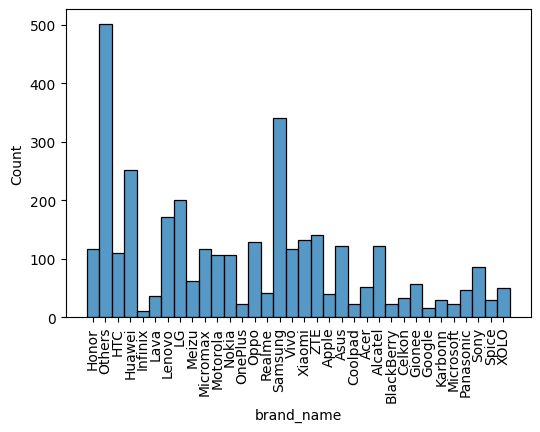

In [12]:
# Plot distribution figures for brand names
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='brand_name')
plt.xticks(rotation=90);

- The data count in others category is the largest.
- Except for the data in others, Samsung has the most data count, and Huawei ranks the second.

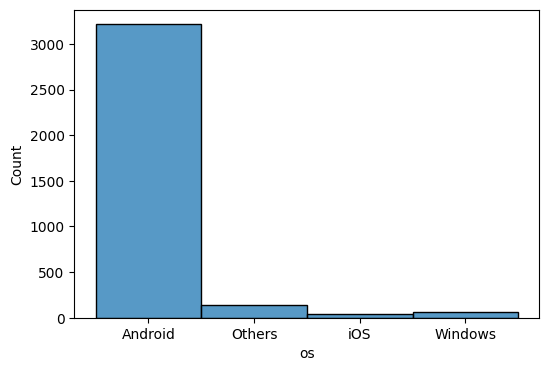

In [13]:
# Distribution plot for os
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='os');

- Most of the devices use Android os in the dataset.

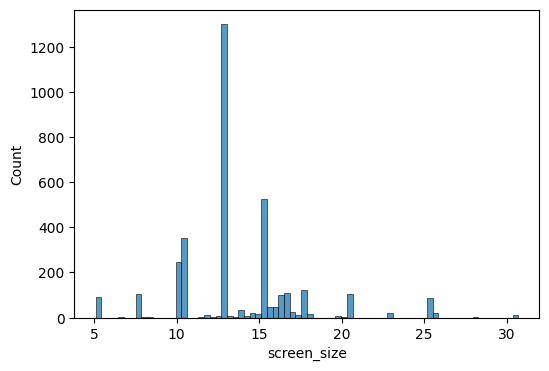

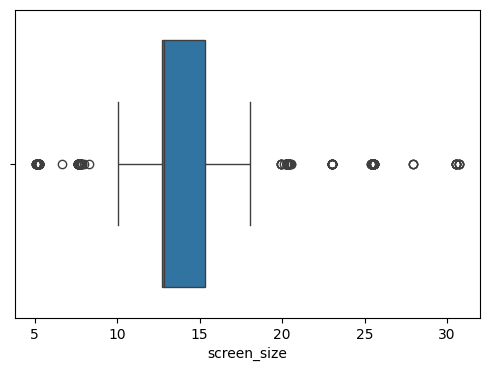

In [14]:
# Distribution and box plots for screen size
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='screen_size')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='screen_size');

- The screen size of used devices have the most data at about 12.5 cm, which is also the 25 percentile and median value of the screen size for all devices.
- More than 75% of the used devices have screen size smaller than 16 cm.
- The smallest screen size of used devices is approximately 5 cm and the largest screen size is larger than 30 cm. There are a number of outliers in the screen size dataset.

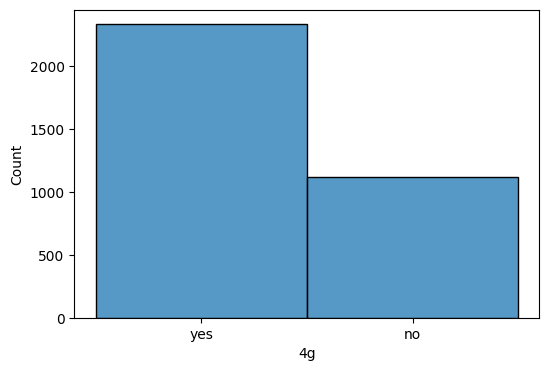

In [15]:
# Histogram for 4g
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='4g');

- The number of devices that support 4g network is approximately two times the number of devices that do not support 4g network.

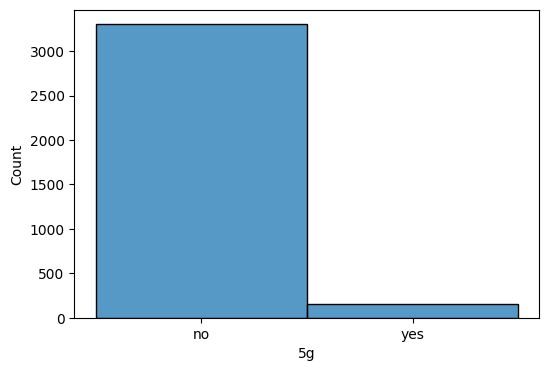

In [16]:
# Histogram for 5g
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='5g');

- Less than 300 devices support 5g network in the datasets.

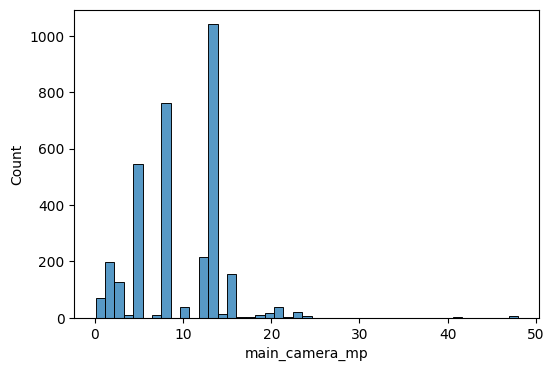

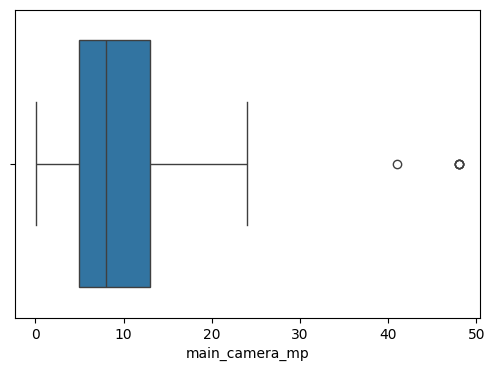

In [17]:
# Histogram and boxplot for main camera megapixels
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='main_camera_mp')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='main_camera_mp');

- The used devices have the most data of main camera resolution at about 13 megapixels.
- The 25 percentile, median, and 75 percentile values for main camera resolutions are around 5 megapixels, 8 megapixels, and 13 megapixels, respectively.
- There are a few outliers in the main camera resolution data, with the highest resolution at nearly 50 megapixels.

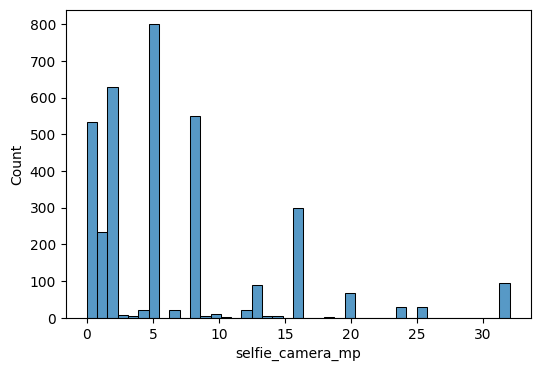

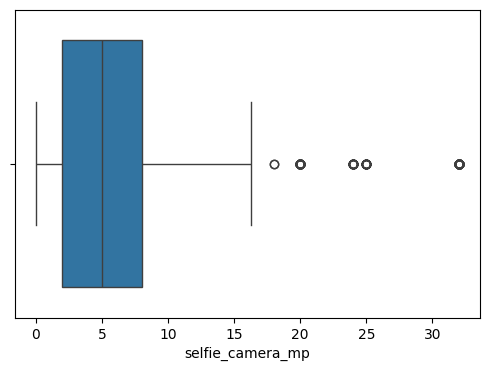

In [18]:
# Histogram and boxplot for selfie camera megapixels
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='selfie_camera_mp')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='selfie_camera_mp');

- The used devices have the most data of selfie camera resolution at about 5 megapixels.
- The 25 percentile, median, and 75 percentile values for selfie camera resolutions are around 2 megapixels, 5 megapixels, and 8 megapixels, respectively.
- There are a few outliers in the selfie camera resolution data, with the highest resolution higher than 30 megapixels.

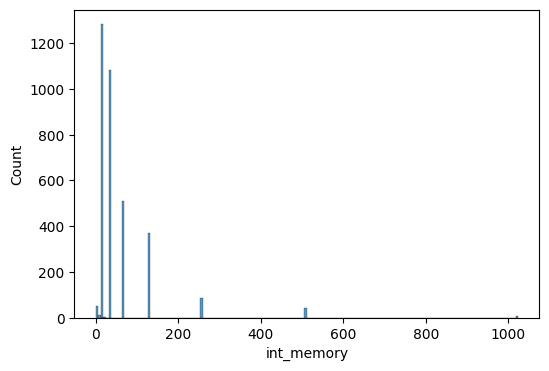

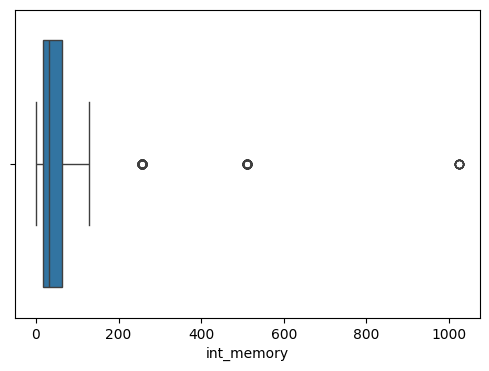

In [19]:
# Plot histogram and boxplot for internal memory
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='int_memory')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='int_memory');

- There are a few outliers in the internal memory dataset, which are larger than 200 GB.
- The internal memory of used devices is mostly found smaller than 100 GB, with the 75 percentile value smaller than 100 GB.
- The distribution of the internal memory is right-skewed.

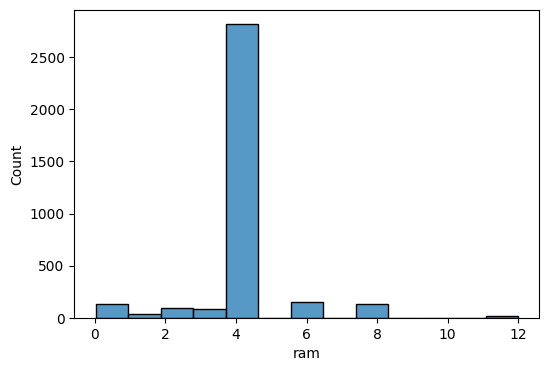

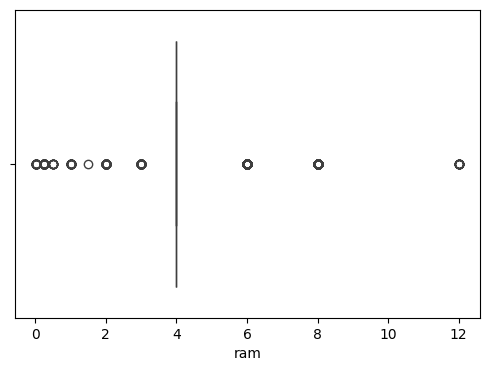

In [20]:
# Plot histogram and boxplot for RAM
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='ram')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='ram');

- The majority of the used devices have ram around 4 GB.

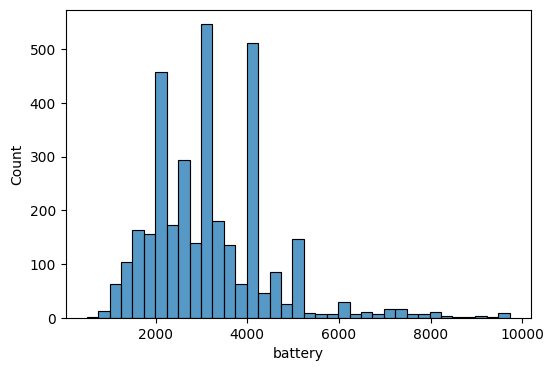

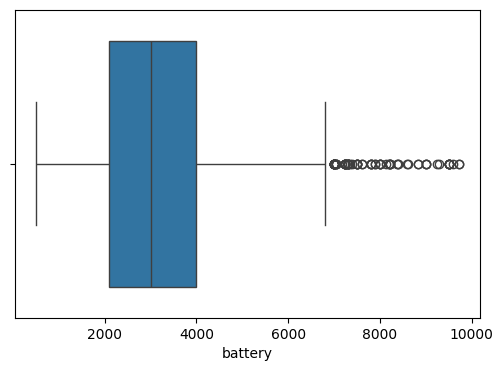

In [21]:
# Plot histogram and boxplot for battery
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='battery')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='battery');

- The distribution of battery capacity is right-skewed.
- The 25 percentile, median, and 75 percentile values of the battery capacity are approximately 2000, 3000, and 4000 mAh, respectively.
- The outlier values of battery capacity are larger than 7000 mAh.

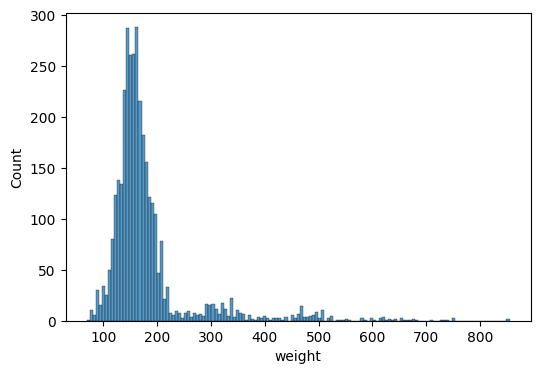

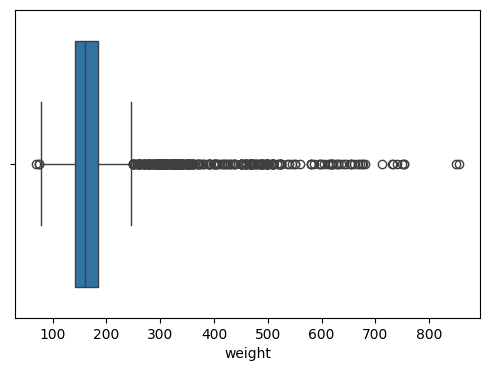

In [22]:
# Plot histogram and boxplot for weight
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='weight')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='weight');

- The distribution of the device weight is right-skewed.
- The distribution of device weight peaks between 150 and 170 grams.
- 75% of the used devices have weight ligher than 200 grams.

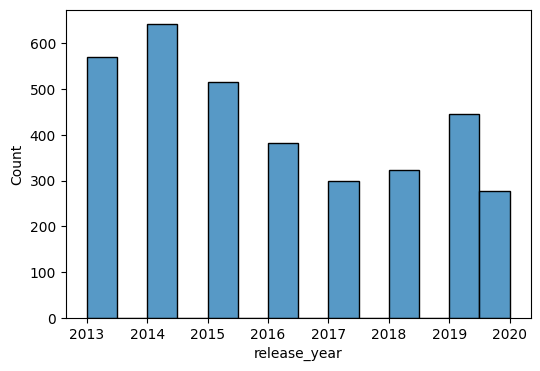

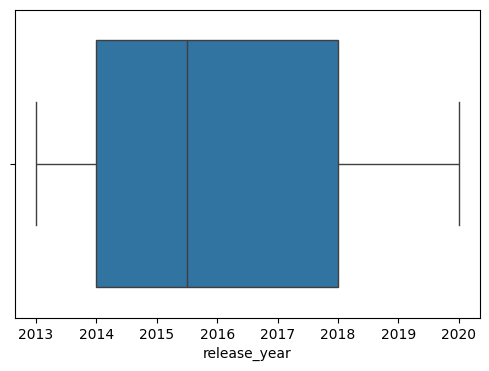

In [23]:
# Plot histogram and boxplot for release year
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='release_year')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='release_year');

- Devices released in 2014 have the largest count in the dataset.
- Devices in the dataset were released between the years 2013 and 2020.

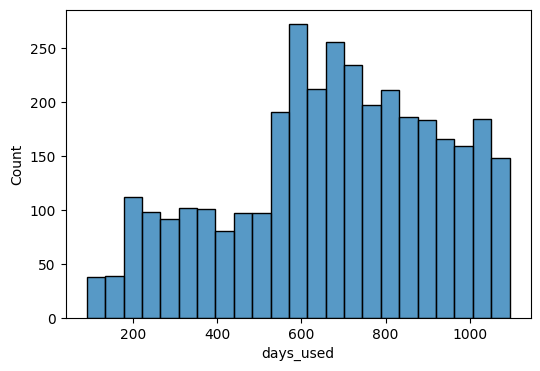

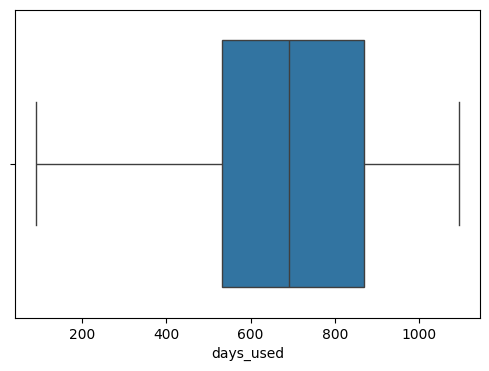

In [24]:
# Plot histogram and boxplot for days used
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='days_used')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='days_used');

- The distribution of device used days peaks at around 600 days.
- 75% of the used devives in the dataset are used for more than 500 days.

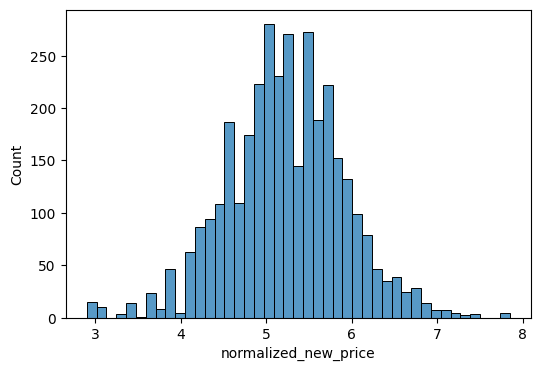

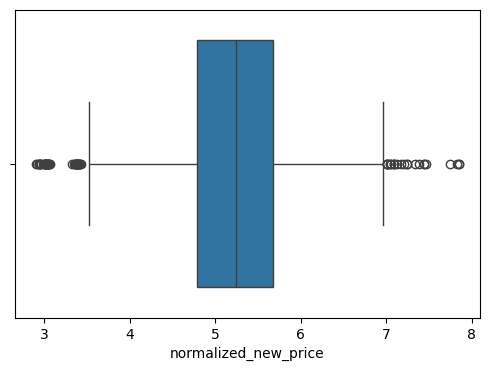

In [25]:
# Plot histogram and boxplot for normalized_new_price
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='normalized_new_price')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='normalized_new_price');

- The normalized new price of devices generally follow the normal distribution in the dataset.
- The distribution of normalized new price peaks aroudn 5 euros.
- The 25 percentile, median, and 75 percentile values of the normalized new price are 4.8, 5.2, and 5.6 euros.

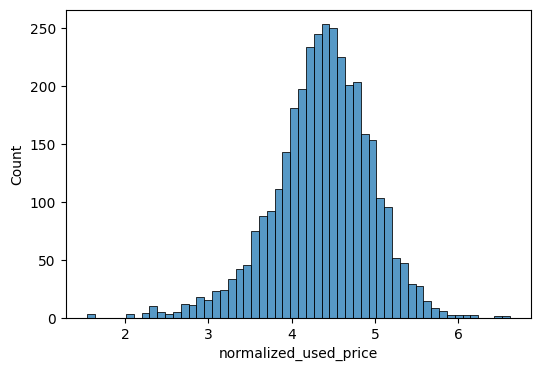

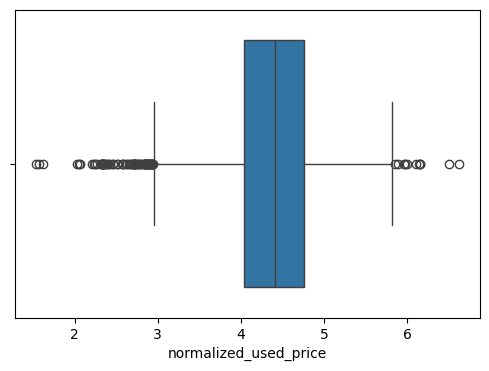

In [26]:
# Plot histogram and boxplot for normalized_used_price
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='normalized_used_price')

plt.figure(figsize=(6,4))
sns.boxplot(data=cdata, x='normalized_used_price');

- The distribution of normalized used price generally follows a normal distribution. It is slightly left-skewed.
- The distribution of normalized used price peaks at around 4.4 euros.
- More than 50% of the used devices have normalized used price between 4 and 5 euros, which is indicated by the interquartile range.

## Bivariate Analysis

### Relations to brands

- Screen size versus brands

<Figure size 600x400 with 0 Axes>

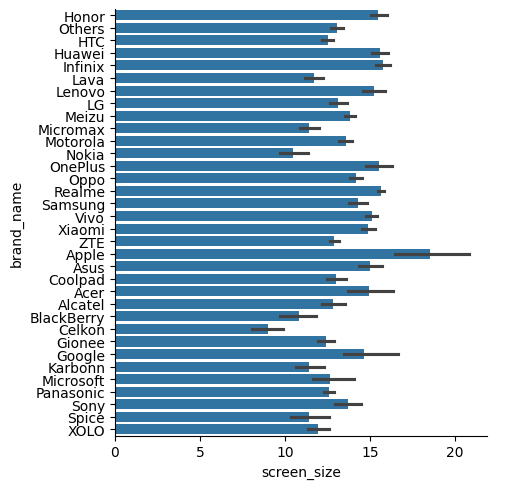

<Figure size 600x400 with 0 Axes>

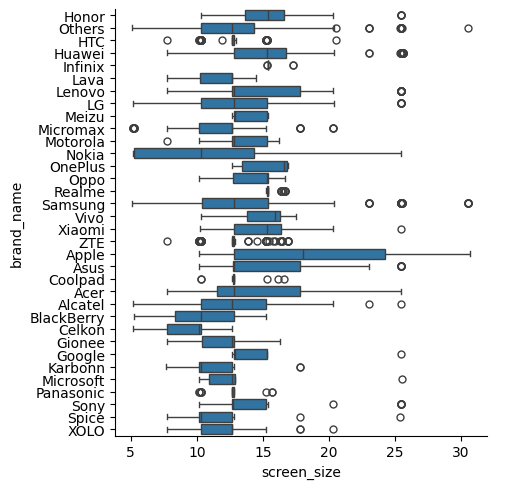

In [27]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='screen_size', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='screen_size', kind='box');

- Apple devices have the largest mean and median screen size compared to all other brands.
- Celkon has the smallest mean screen size. BlackBerry and Nokia also have smaller mean screen size than the rest brands.
- Nokia, Celkon, and BlackBerry have smaller lower quartile screen sizes compared to other brands.

- Main camera resolution versus brands

<Figure size 600x400 with 0 Axes>

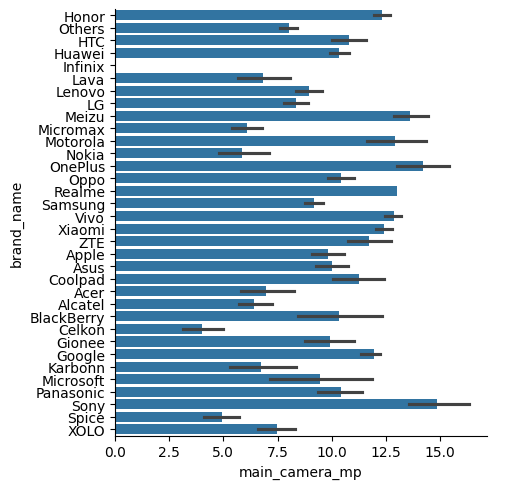

<Figure size 600x400 with 0 Axes>

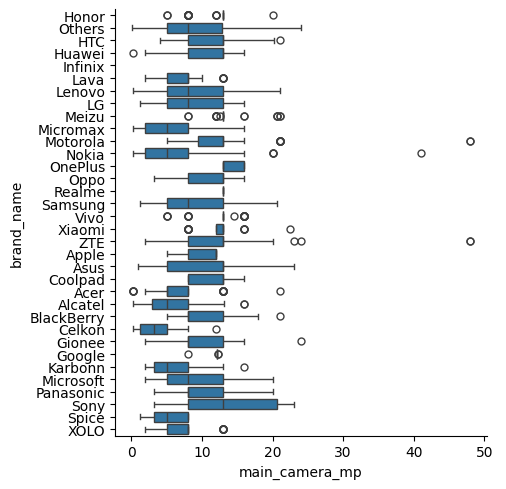

In [28]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='main_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='main_camera_mp', kind='box');

- Sony has the highest mean and upper quartile values of main camera resolution compared to other brands.
- Celkon has the lowest mean, median, lower and upper quartile values of main camera resolution compared other brands.
- Infinix has no data shown for main camera resolution.

- Selfie camera resolution versus brands

<Figure size 600x400 with 0 Axes>

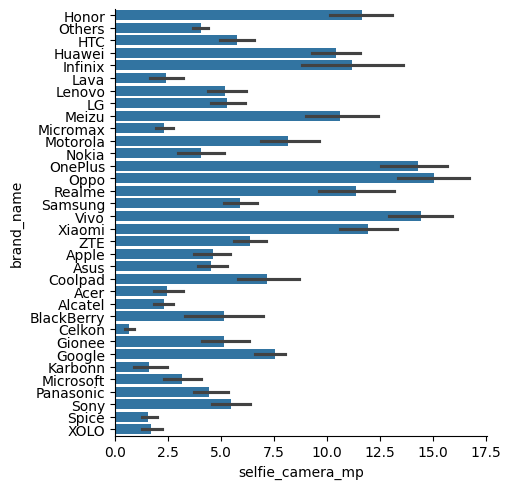

<Figure size 600x400 with 0 Axes>

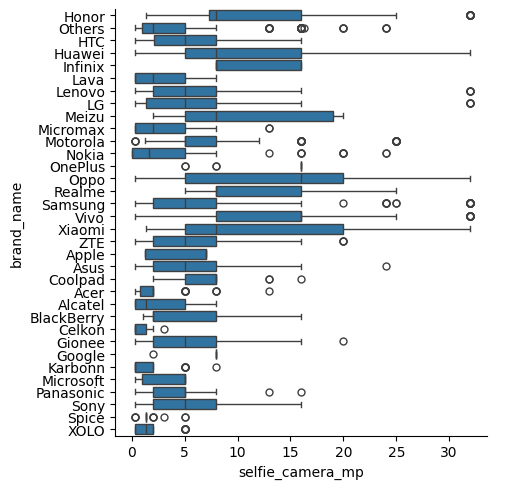

In [29]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='selfie_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='selfie_camera_mp', kind='box');

- Oppo, Vivo, and OnePlus rank the top three brands for the mean selfie camera resolution, while Celkon ranks the lowest.
- Oppo has the largest median selfie camera resolution compared to other brands.
- The mean selfie camera resolutioins for Vivo and OnePlus are impacted by outlier values.


- ROM versus brands

<Figure size 600x400 with 0 Axes>

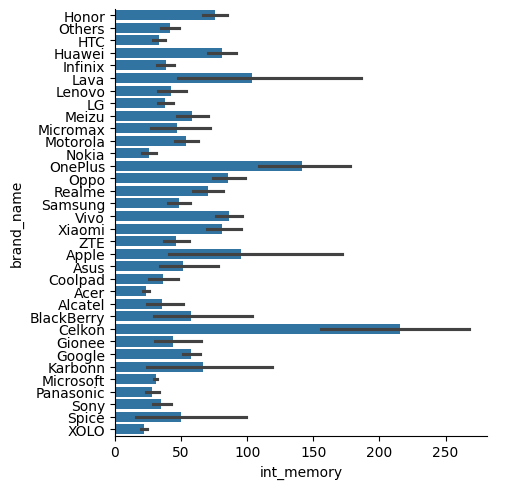

<Figure size 600x400 with 0 Axes>

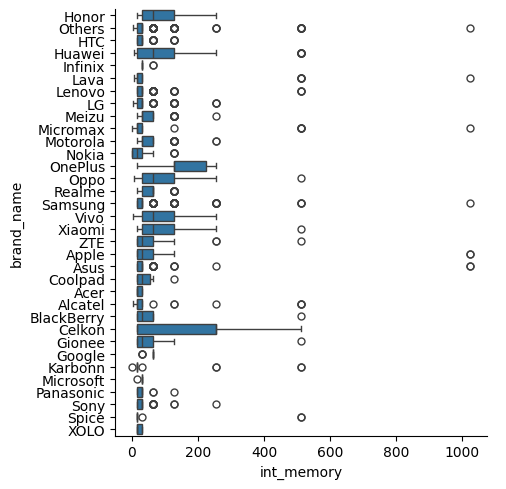

In [30]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='int_memory', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='int_memory', kind='box');

- Celkon has the largest mean ROM compared other brands. OnePlus ranks the second for mean ROM.
- Celkon and OnePlus also ranks the top two for the upper quartile values of ROM.

- RAM versus brands

<Figure size 600x400 with 0 Axes>

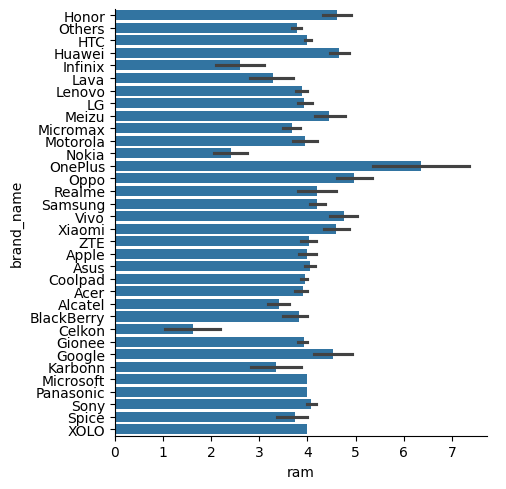

<Figure size 600x400 with 0 Axes>

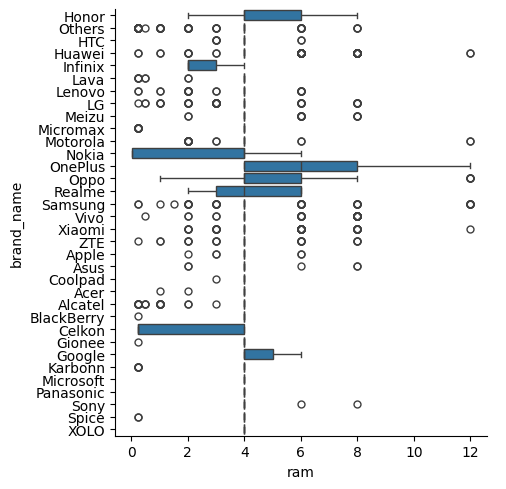

In [31]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='ram', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='ram', kind='box');

- Most of the brands use 4 GB RAM for most of their devices, indicated by the feature that mean RAM size is 4 GB for most brands and the overlapped lower quartile, median, and upper quartile values of RAM at 4 GB for most brands.
- Among all brands, OnePlus has the largest mean RAM sizes, and Celkon has the smallest men RAM size.
- OnePlus devices have the largest median and upper quartile values of RAM among all brands. Celkon and Nokia devices have smaller median and lower quartile values of RAM size compared to other brands.

- Battery versus brands

<Figure size 600x400 with 0 Axes>

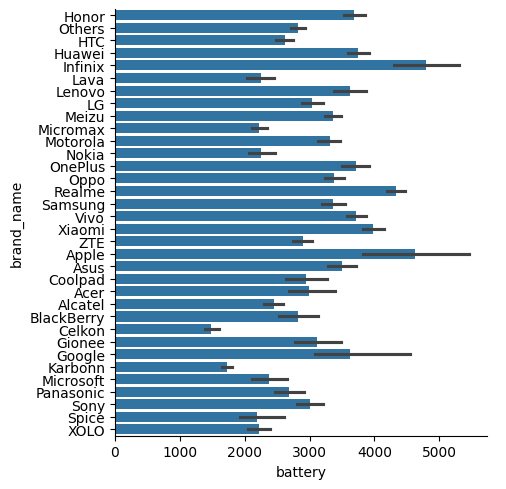

<Figure size 600x400 with 0 Axes>

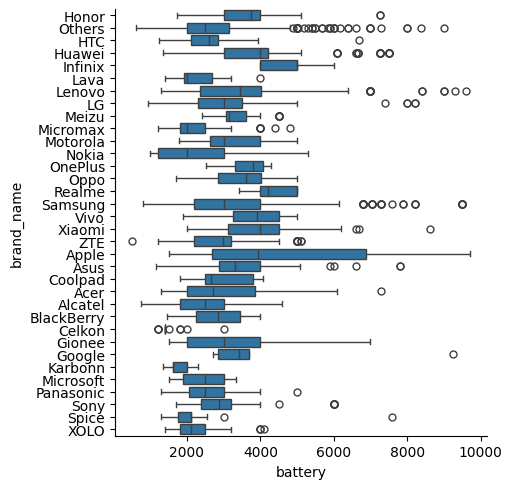

In [32]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='battery', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='battery', kind='box');

- Among all brands, Infinix has the largest mean battery size. Apple ranks the second. Celkon has the smallest mean battery size.
- Apple devices have the largest upper quartile values of battery size, and Apple has the largest interquartile range of battery size compared to other brands.

- Weight versus brands

<Figure size 600x400 with 0 Axes>

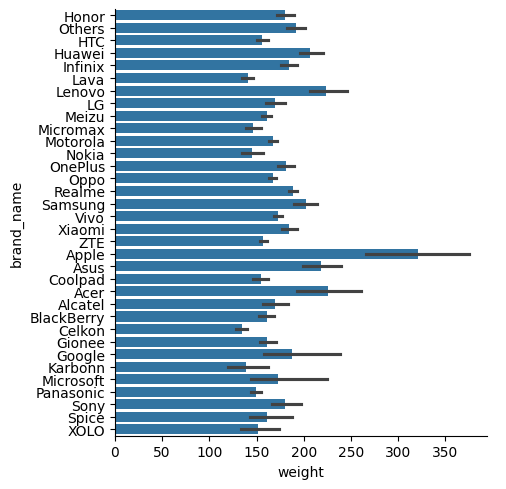

<Figure size 600x400 with 0 Axes>

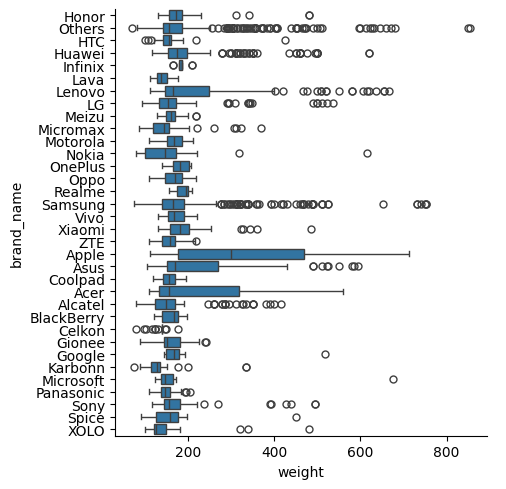

In [33]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='weight', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='weight', kind='box');

- Apple in genreal is the heaviest device.

- Days used versus brands

<Figure size 600x400 with 0 Axes>

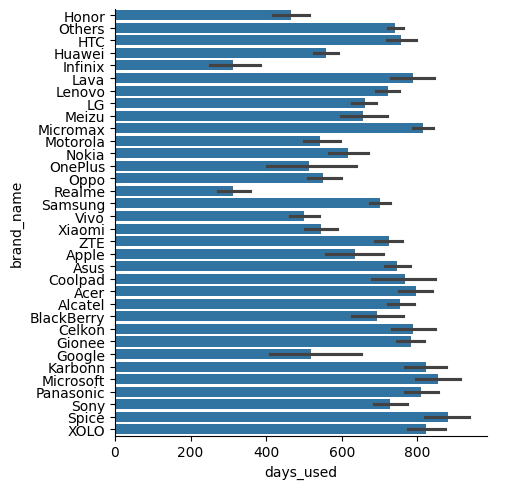

<Figure size 600x400 with 0 Axes>

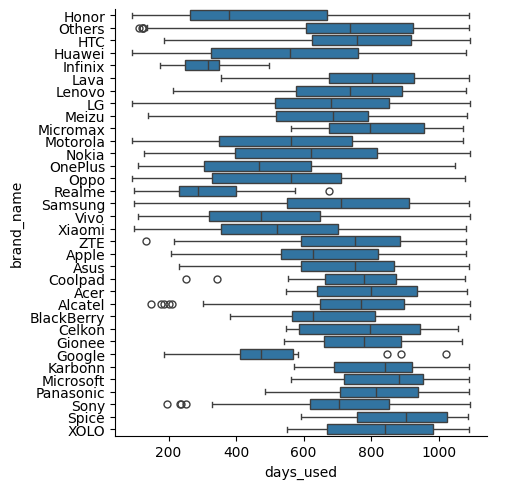

In [34]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='days_used', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='days_used', kind='box');

- In general, Spice devices are used for the longest days among all brands. Microsoft devices ranks the second.
- Infinix and Realme devices are used for the shortest days.

- Normalized new price versus brands

<Figure size 600x400 with 0 Axes>

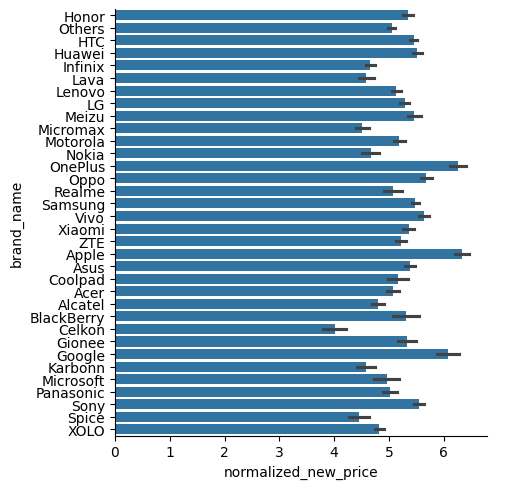

<Figure size 600x400 with 0 Axes>

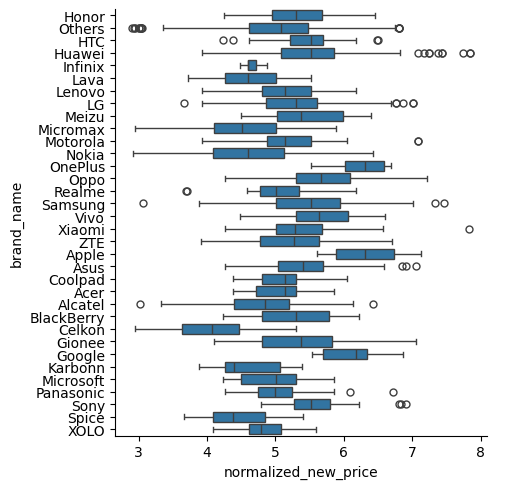

In [35]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='normalized_new_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='normalized_new_price', kind='box');

- Apple, OnePlus, and Google devices rank the top three for new prices. Celkon costs the least for new devices.

- Normalized used price versus brands

<Figure size 600x400 with 0 Axes>

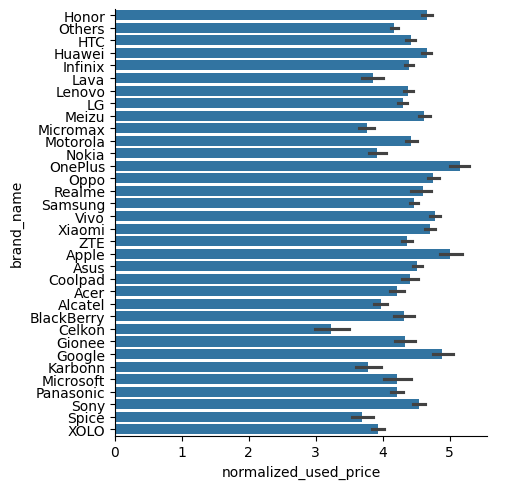

<Figure size 600x400 with 0 Axes>

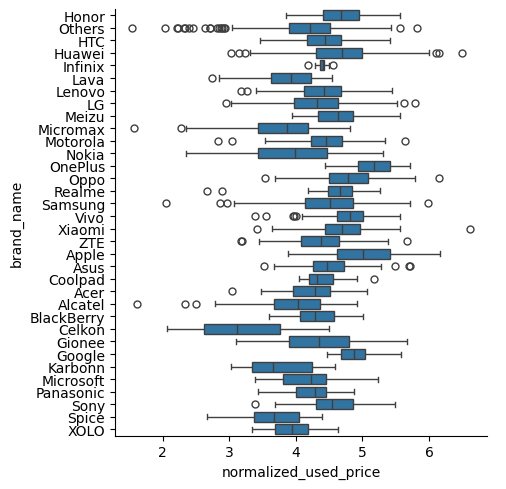

In [36]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='normalized_used_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='normalized_used_price', kind='box');

- OnePlus, Apple, and Google also rank the top three for used prices. Celkon price also ranks the lowest for used devices.

### Relations with os

- Screen size versus os

<Figure size 600x400 with 0 Axes>

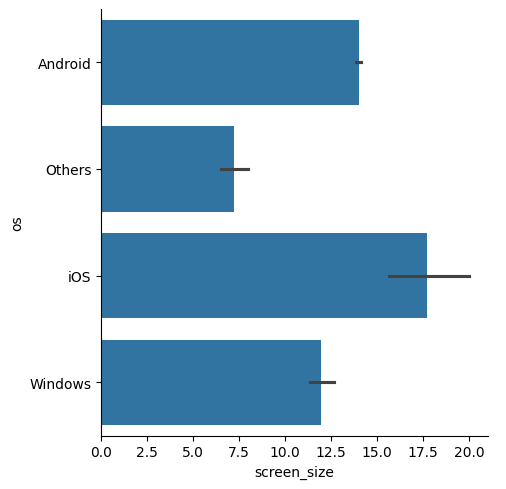

<Figure size 600x400 with 0 Axes>

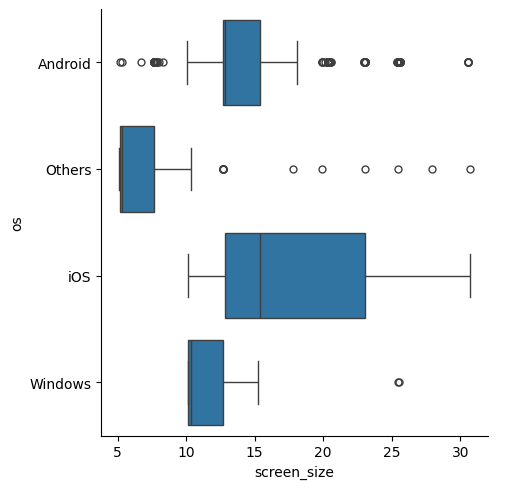

In [37]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='screen_size', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='screen_size', kind='box');

- In general, IOS devices have larger screen sizes (mean, median, and upper quartile values) than other devices.

- Main camera resolution versus os

<Figure size 600x400 with 0 Axes>

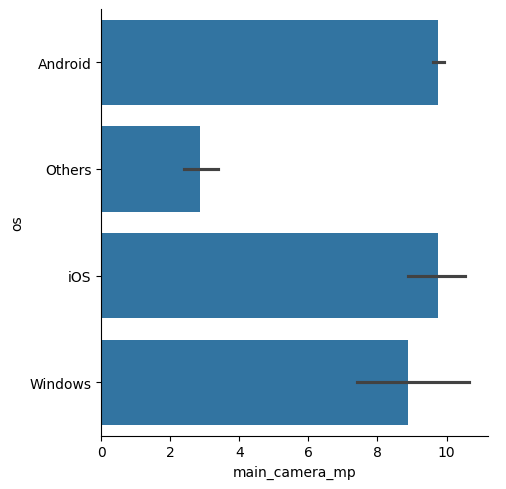

<Figure size 600x400 with 0 Axes>

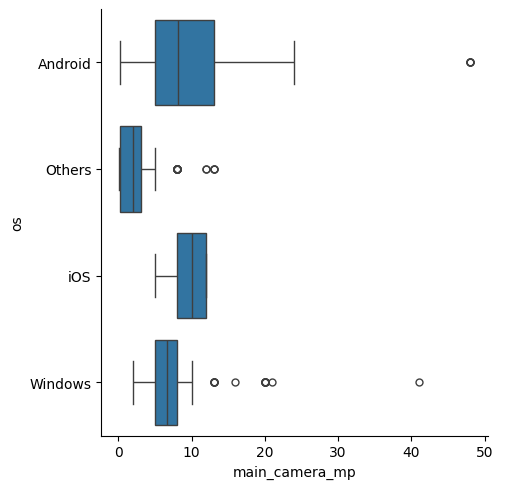

In [38]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='main_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='main_camera_mp', kind='box');

- Android devices have slightly higher mean main camera resolution than IOS devices, which makes it to rank the first. However, the interquartile range of main camera resolution for Android devices is larger than other os devices.

- Selfie camera resolution versus os

<Figure size 600x400 with 0 Axes>

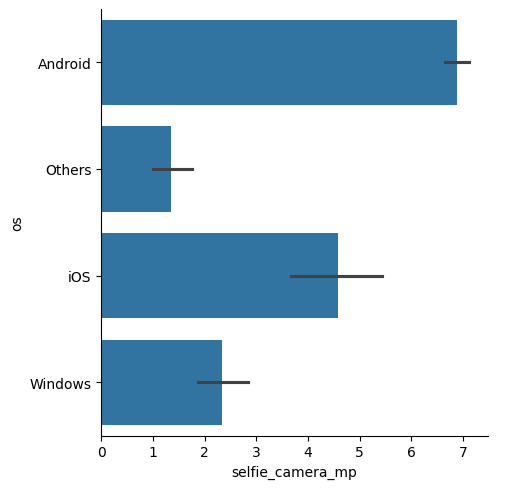

<Figure size 600x400 with 0 Axes>

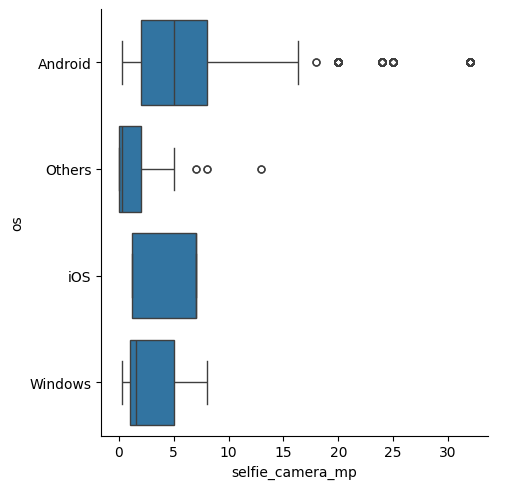

In [39]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='selfie_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='selfie_camera_mp', kind='box');

- Android devices have higher selfie camera resolution than all other os devices.

- ROM versus os

<Figure size 600x400 with 0 Axes>

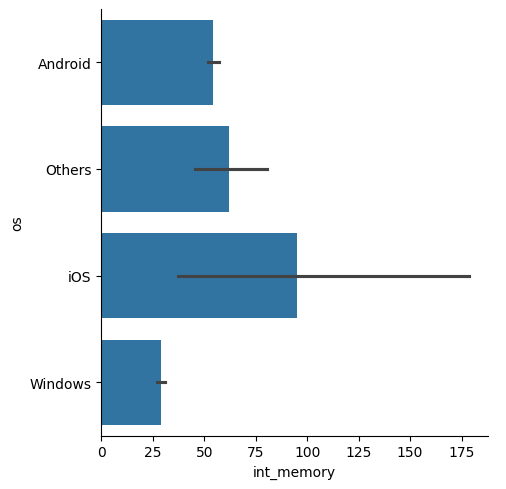

<Figure size 600x400 with 0 Axes>

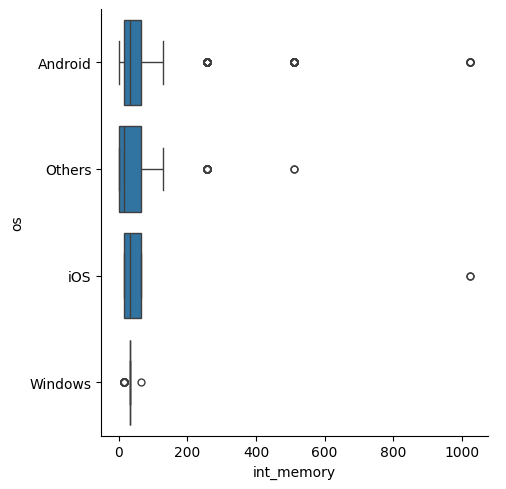

In [40]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='int_memory', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='int_memory', kind='box');

- IOS devices seem to have larger ROM than all other os devices, but the value can be impacted by the outliers.

- RAM versus os

<Figure size 600x400 with 0 Axes>

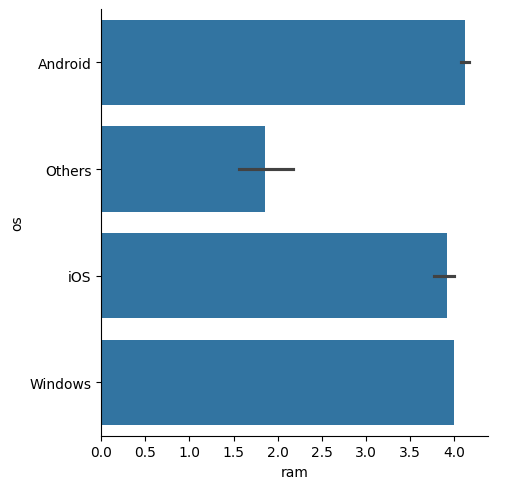

<Figure size 600x400 with 0 Axes>

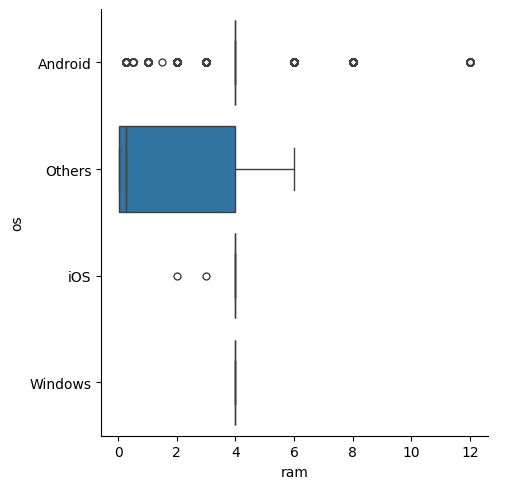

In [41]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='ram', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='ram', kind='box');

- Others devices have smaller ram than other os devices.
- Although Android, iOS, and Windows devices are dominated by 4 GB RAM devices, there are more outliers in the Android devices.

- Battery versus os

<Figure size 600x400 with 0 Axes>

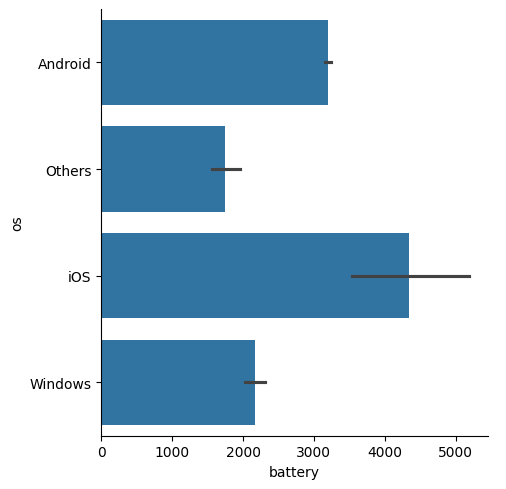

<Figure size 600x400 with 0 Axes>

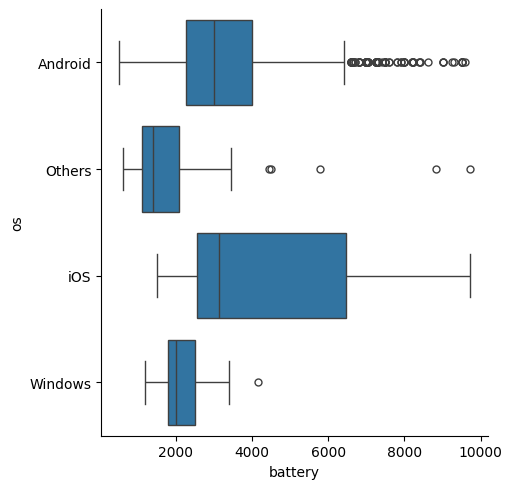

In [42]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='battery', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='battery', kind='box');

- iOS devices generally have larger battery capacity than other os devices. But the Android devices have more outliers in the battery capacity.

- Weight versus os

<Figure size 600x400 with 0 Axes>

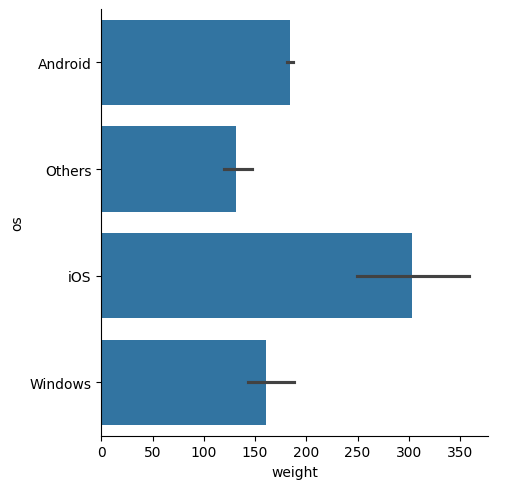

<Figure size 600x400 with 0 Axes>

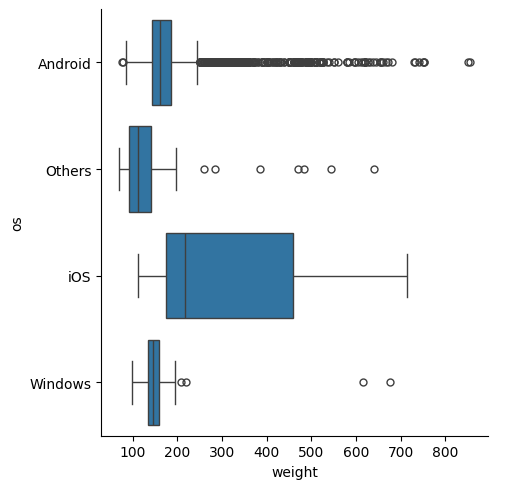

In [43]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='weight', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='weight', kind='box');

- iOS devices are the heavier than other os devices, while others devices generally are lighter.

- Days used versus os

<Figure size 600x400 with 0 Axes>

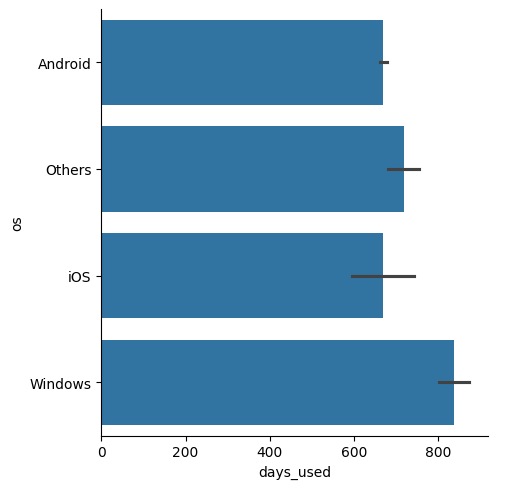

<Figure size 600x400 with 0 Axes>

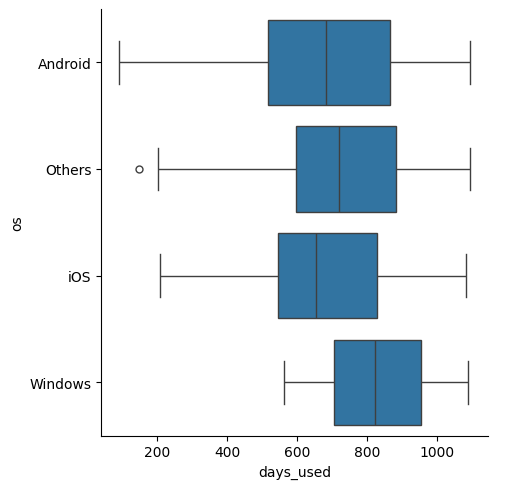

In [44]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='days_used', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='days_used', kind='box');

- Windows devices are generally used longer than other os devices, indicated by the larger mean, lower quartile, median, and upper quartile values.

- Normalized new price versus os

<Figure size 600x400 with 0 Axes>

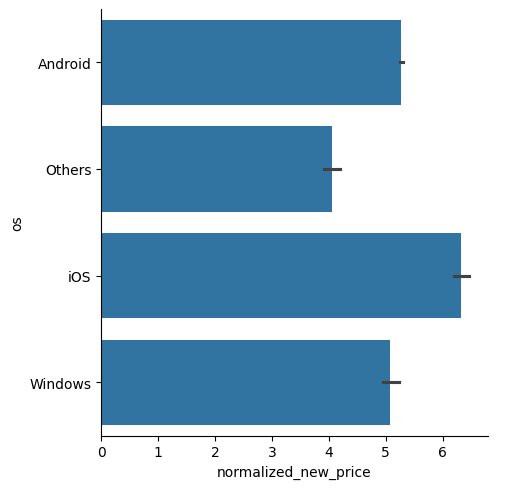

<Figure size 600x400 with 0 Axes>

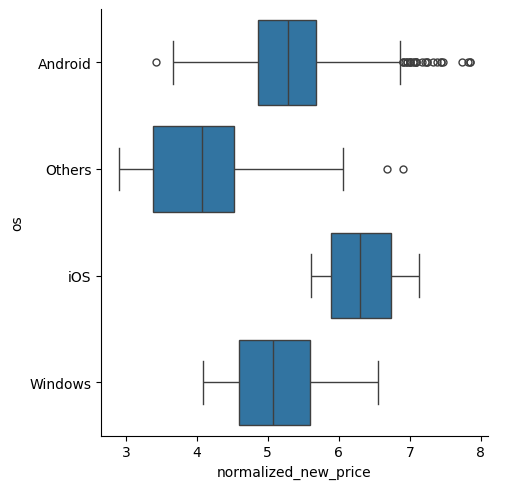

In [45]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='normalized_new_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='normalized_new_price', kind='box');

- New iOS devices cost more than other os devices, while new others devices cost the least.

- Normalized used price versus os

<Figure size 600x400 with 0 Axes>

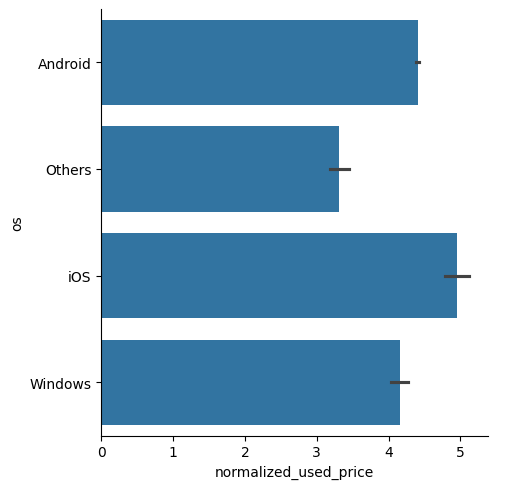

<Figure size 600x400 with 0 Axes>

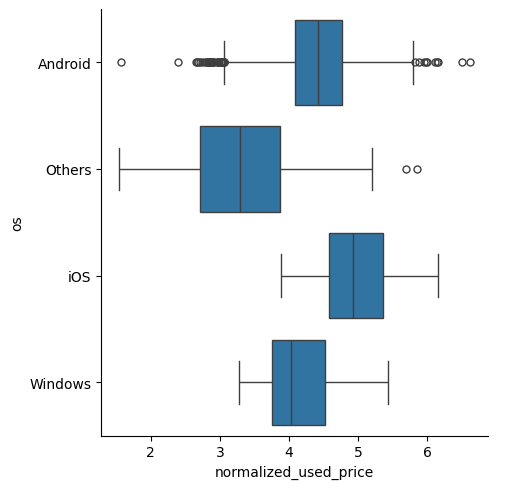

In [46]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='normalized_used_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='os', x='normalized_used_price', kind='box');

- Used iOS devices also cost more than other os devices, while used others devices also cost the least.

### Relations with release year

- Screen size versus release year

<Figure size 600x400 with 0 Axes>

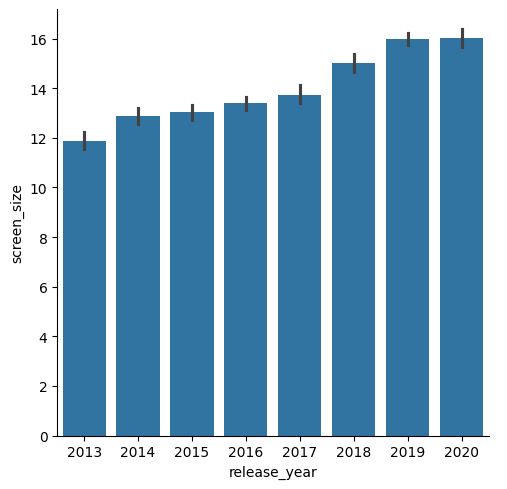

<Figure size 600x400 with 0 Axes>

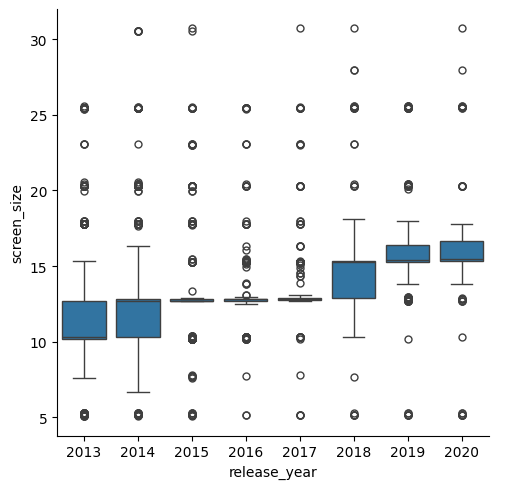

In [47]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='screen_size', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='screen_size', kind='box');

- Newly released devices generally have larger screen sizes than old devices.

- Main camera resolution versus release year

<Figure size 600x400 with 0 Axes>

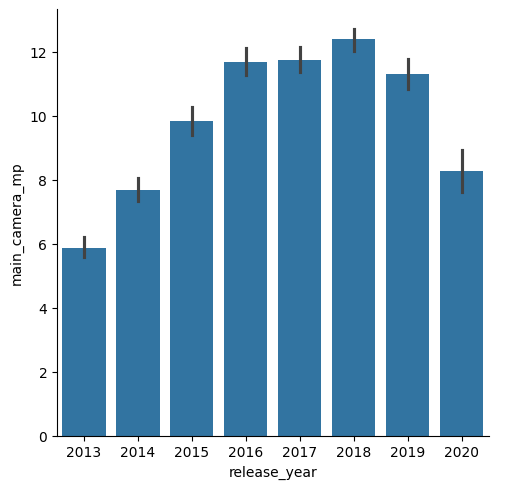

<Figure size 600x400 with 0 Axes>

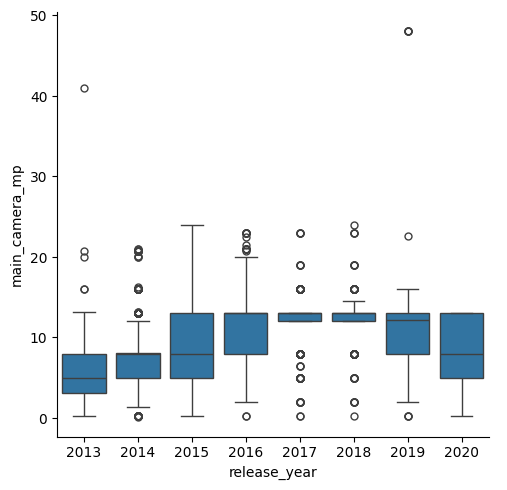

In [48]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='main_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='main_camera_mp', kind='box');

- The main camera resolution increases with time before the year 2018. After the year 2018, main camera resolution tends to decrease with time.

- Selfie camera resolution

<Figure size 600x400 with 0 Axes>

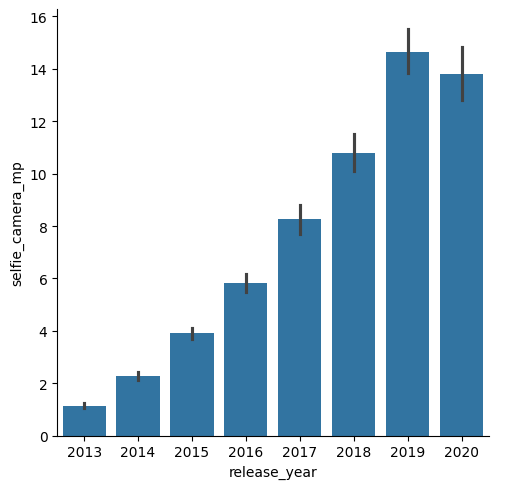

<Figure size 600x400 with 0 Axes>

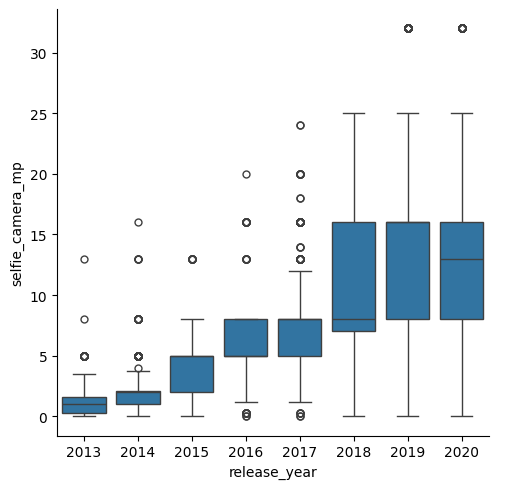

In [49]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='selfie_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='selfie_camera_mp', kind='box');

- Selfie camera resolution increases with time until the year 2019. The mean selfie camera resolution is lower for devices released in 2020 than 2019.

- ROM versus release year

<Figure size 600x400 with 0 Axes>

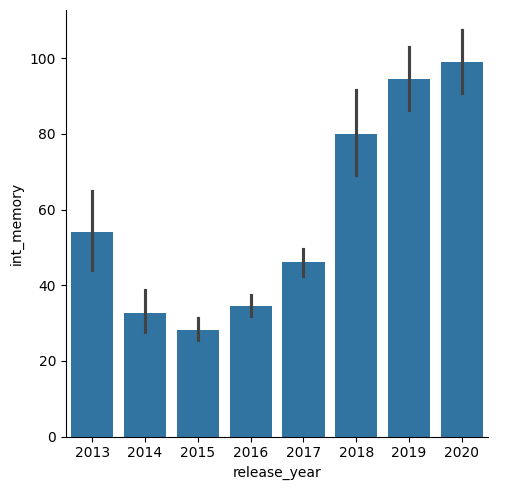

<Figure size 600x400 with 0 Axes>

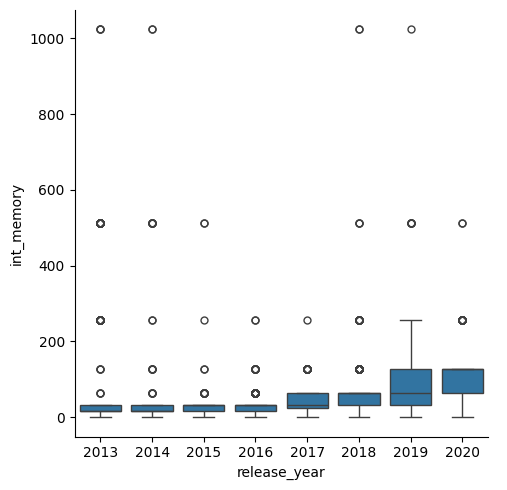

In [50]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='int_memory', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='int_memory', kind='box');

- ROM decreases from 2013 to 2015 and then starts to increase from 2016 to 2020.

- RAM versus release year

<Figure size 600x400 with 0 Axes>

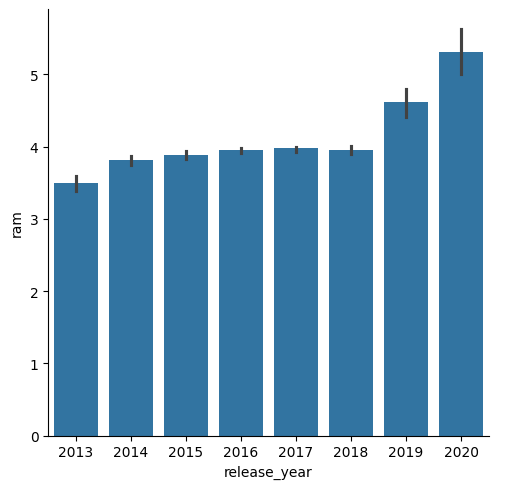

<Figure size 600x400 with 0 Axes>

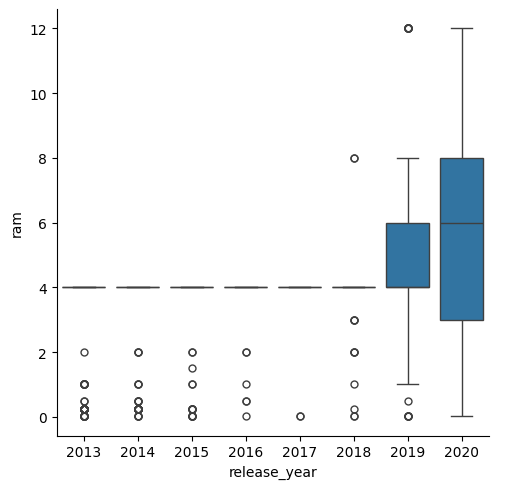

In [51]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='ram', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='ram', kind='box');

- RAM is nearly all 4 GB for devices released before the year 2019. RAM starts to increase for devices released in 2019 and after.
- Devices released in 2019 and 2020 have more variations in RAM amounts than earlier years.

- Battery versus release year

<Figure size 600x400 with 0 Axes>

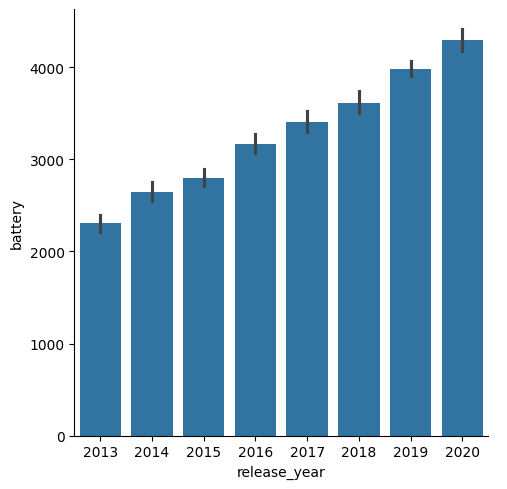

<Figure size 600x400 with 0 Axes>

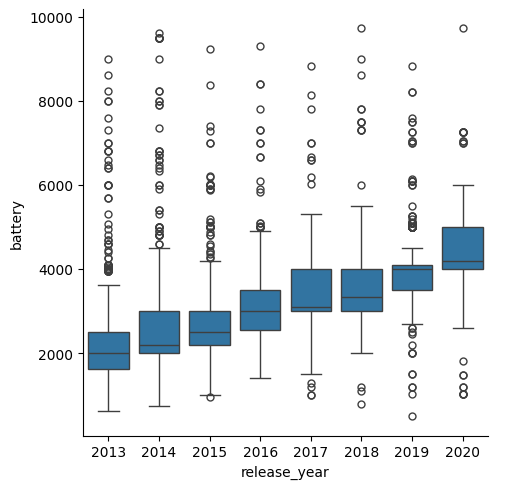

In [52]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='battery', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='battery', kind='box');

- Battery capacity steadily increases with time.

- Weight versus release year

<Figure size 600x400 with 0 Axes>

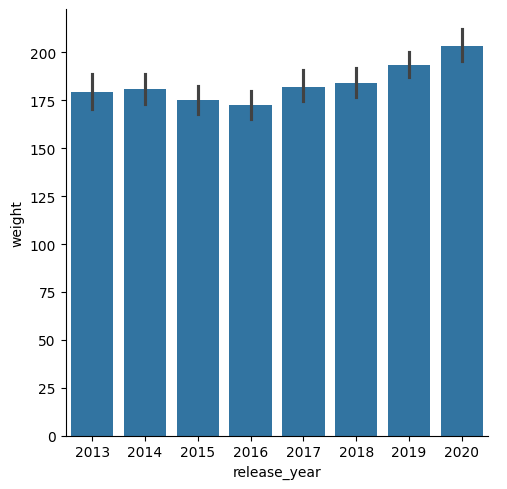

<Figure size 600x400 with 0 Axes>

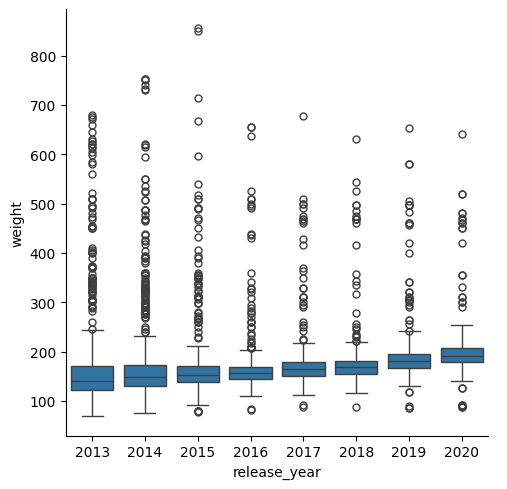

In [53]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='weight', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='weight', kind='box');

- The median device weight increases with time from 2013 to 2020, but the mean device weight increases with time from 2016 to 2020.

Days used versus release year

<Figure size 600x400 with 0 Axes>

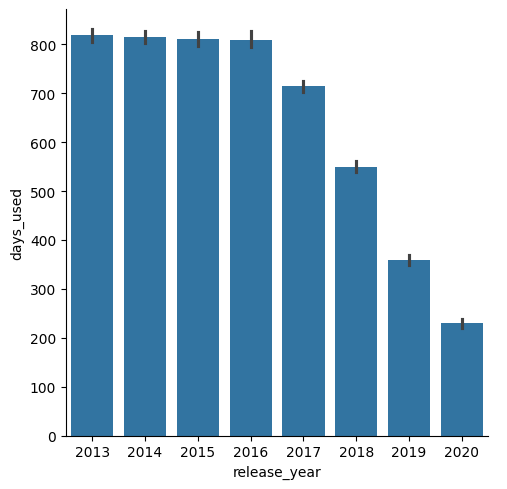

<Figure size 600x400 with 0 Axes>

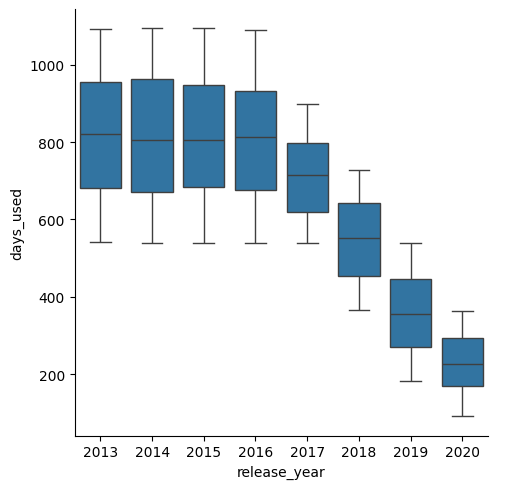

In [54]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='days_used', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='days_used', kind='box');

- The mean and median days used for devices released from 2013 to 2016 are comparable. The days used for devices released from 2017 to 2020 decrease steadily.

- Normalized new price versus release year

<Figure size 600x400 with 0 Axes>

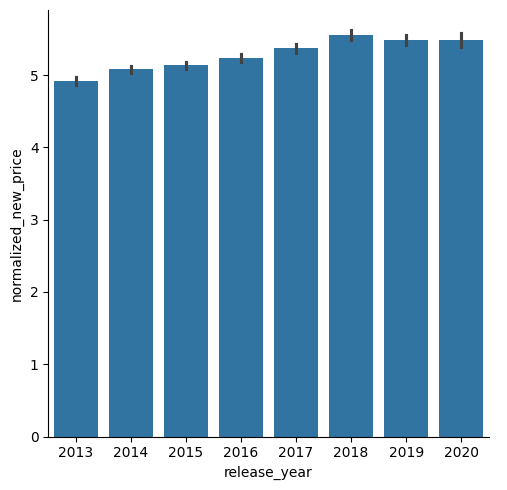

<Figure size 600x400 with 0 Axes>

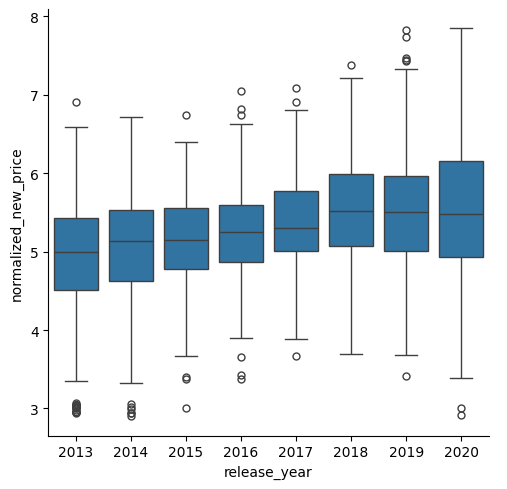

In [55]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='normalized_new_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='normalized_new_price', kind='box');

- The new device price increases from 2013 to 2018, and the price tends to become stable from 2018 to 2020.

- Normalized used price versus release year

<Figure size 600x400 with 0 Axes>

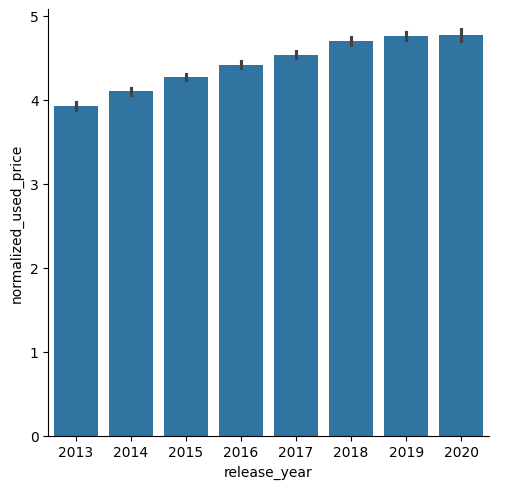

<Figure size 600x400 with 0 Axes>

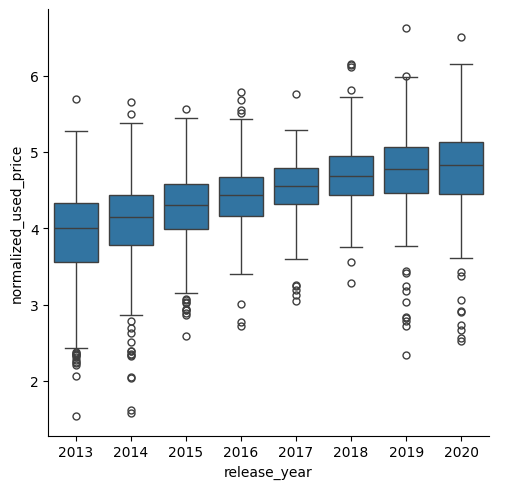

In [56]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='normalized_used_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='release_year', y='normalized_used_price', kind='box');

- Used device price increases with time from 2013 to 2020.

### Relations with 4g and 5g

- New price versus 4g

<Figure size 600x400 with 0 Axes>

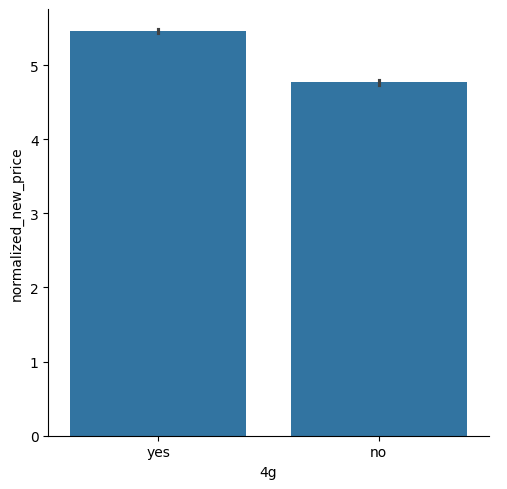

<Figure size 600x400 with 0 Axes>

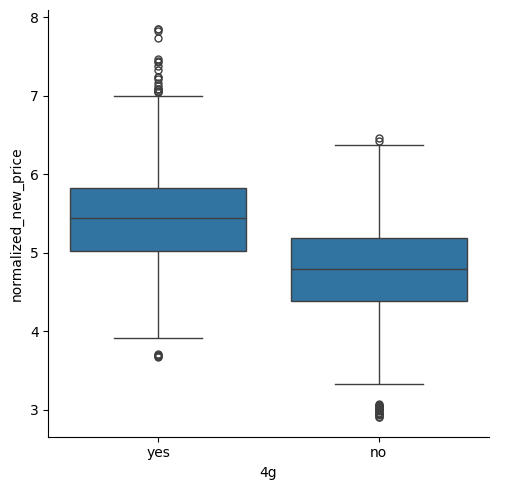

In [57]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='4g', y='normalized_new_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='4g', y='normalized_new_price', kind='box');

- The normalized new price for devices offering 4g support is higher than devices without 4g support.

<Figure size 600x400 with 0 Axes>

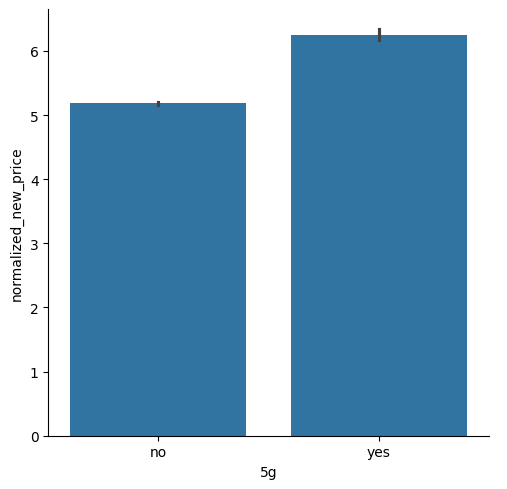

<Figure size 600x400 with 0 Axes>

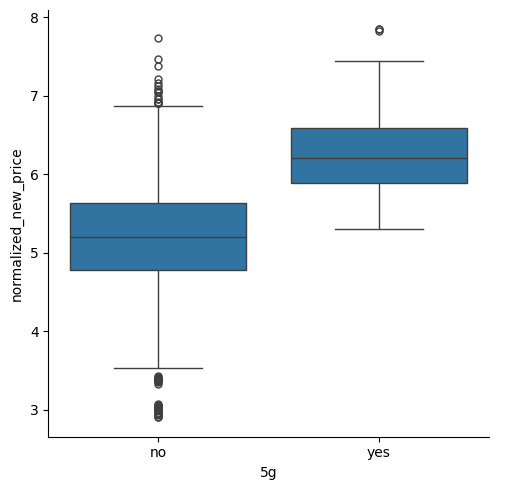

In [58]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='5g', y='normalized_new_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='5g', y='normalized_new_price', kind='box');

- The normalized new price for devices offering 5g support is higher than devices without 5g support.

<Figure size 600x400 with 0 Axes>

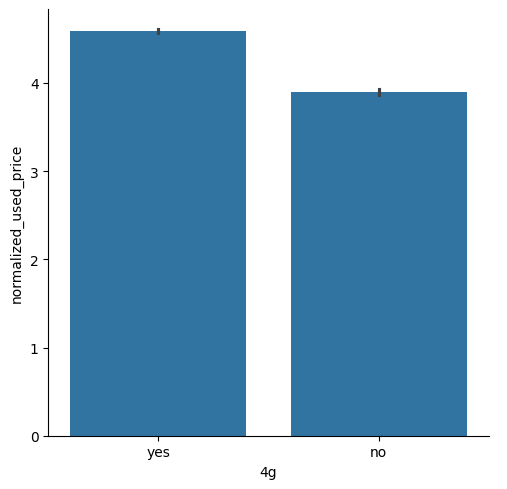

<Figure size 600x400 with 0 Axes>

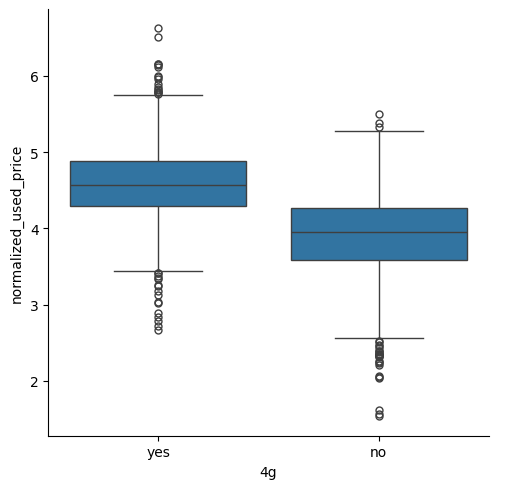

In [59]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='4g', y='normalized_used_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='4g', y='normalized_used_price', kind='box');

- The normalized used price for devices offering 4g support is higher than devices without 4g support.

<Figure size 600x400 with 0 Axes>

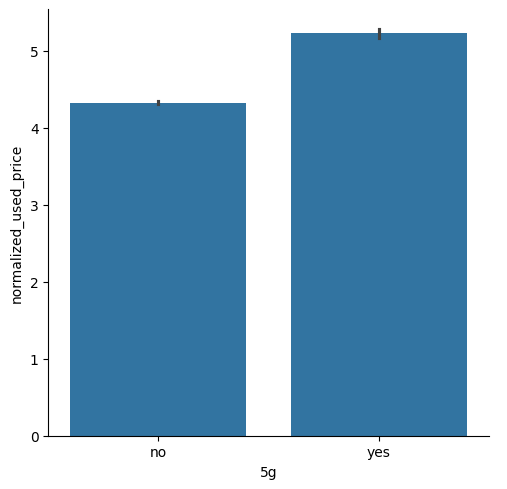

<Figure size 600x400 with 0 Axes>

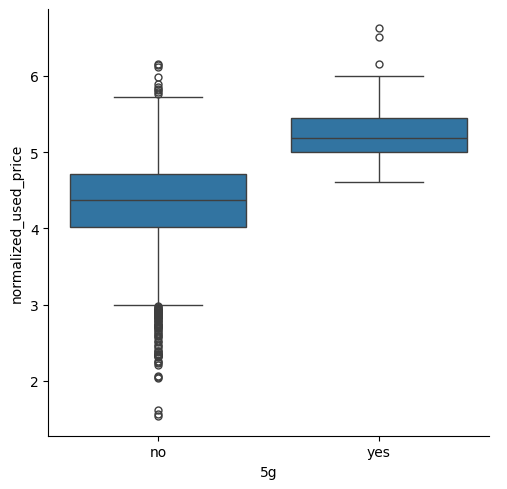

In [60]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='5g', y='normalized_used_price', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, x='5g', y='normalized_used_price', kind='box');

- The normalized used price for devices offering 5g support is higher than devices without 5g support.

### Correlations between variables

In [61]:
# Drop categorical variables
cdata_copy = cdata.drop(['brand_name','os','4g','5g','release_year'], axis=1)
cdata_copy.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  days_used  normalized_used_price  normalized_new_price  
0   146.0        127               4.307572              4.715100  
1   213.0        325               5.162097              5.519018  
2   213.0        162               5.111084              5.884631  
3   480.0        345               5.135387              5.630961  
4   185.0        293               4.389995              4.947837

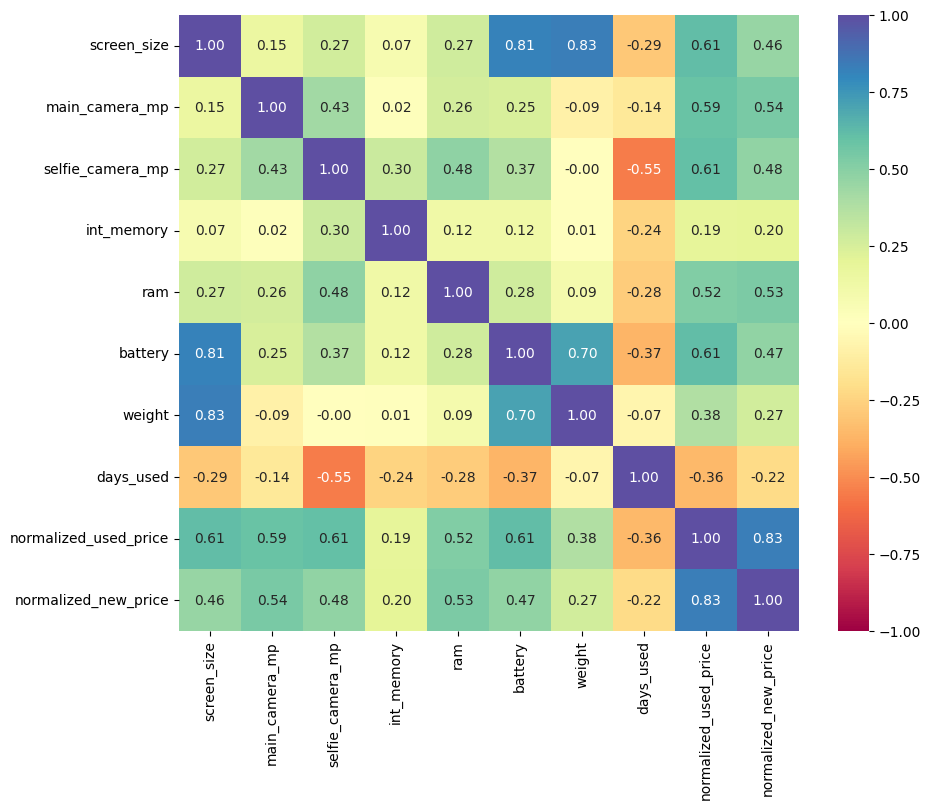

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(cdata_copy.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral');

- There are strong positive correlations between screen size and battery size, between screen size and device weight, and normalized used price and new price.
- Days used has a relatively strong negative correlation with selfie camera resolution.
- Normalized used price has a relatively strong positive correlation with screen size, main and selfie camera resolutions, RAM amount, battery size.

## Questions:

1. What does the distribution of normalized used device prices look like?

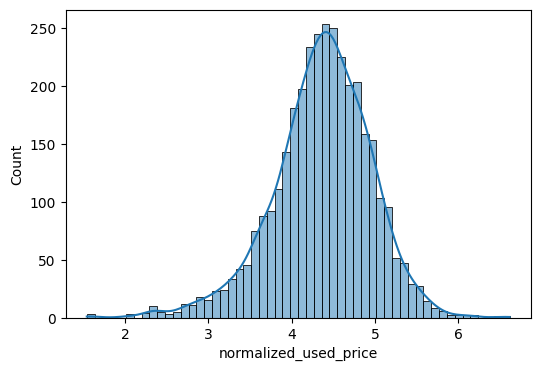

In [63]:
plt.figure(figsize=(6,4))
sns.histplot(data=cdata, x='normalized_used_price', kde=True);

- The distribution of normalized used device prices looks like a normal distribution. It is slightly left-skewed.

2. What percentage of the used device market is dominated by Android devices?

In [64]:
print('Android devices contribute to '+str(np.round(cdata[cdata['os'] == 'Android'].shape[0]/cdata.shape[0]*100, 1))+'% of the used device market.')

Android devices contribute to 93.1% of the used device market.



3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

<Figure size 600x400 with 0 Axes>

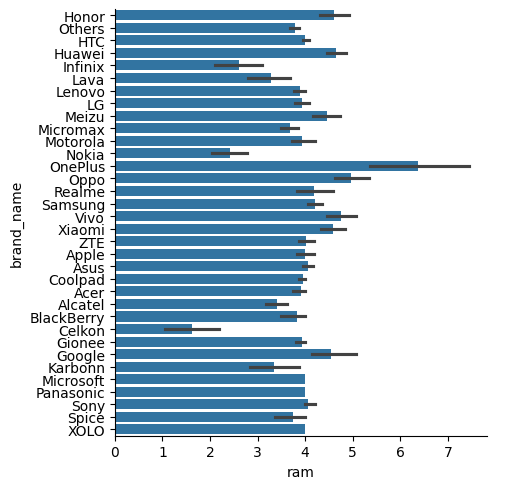

<Figure size 600x400 with 0 Axes>

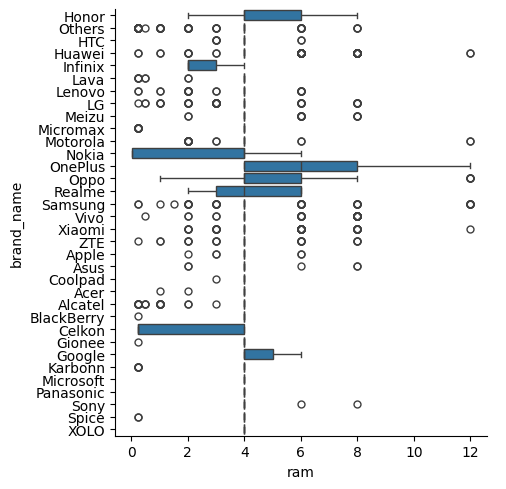

In [65]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='ram', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata, y='brand_name', x='ram', kind='box');

- Most of the brands use 4 GB RAM for most of their devices, indicated by the feature that mean RAM size is 4 GB for most brands and the overlapped lower quartile, median, and upper quartile values of RAM at 4 GB for most brands.
- Among all brands, OnePlus has the largest mean RAM sizes, and Celkon has the smallest men RAM size.
- OnePlus devices have the largest median and upper quartile values of RAM among all brands. Celkon and Nokia devices have smaller median and lower quartile values of RAM size compared to other brands.

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

<Figure size 600x400 with 0 Axes>

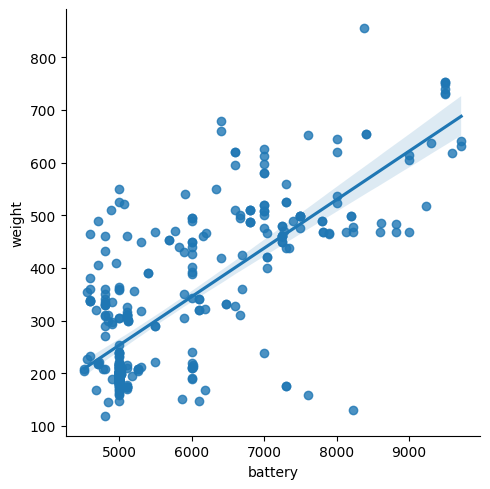

In [66]:
plt.figure(figsize=(6,4))
sns.lmplot(data=cdata[cdata['battery'] > 4500], x='battery', y='weight', );

- The device weight tends to increase with battery size for devices offering large battery capacity (more than 4500 mAh).

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [67]:
# Get the data with device screen size larger than 6 inches. Convert unit inch to cm.
cdata_screen = cdata[cdata['screen_size'] > 6*2.54]
cdata_screen.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   
5      Honor  Android        16.23  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   
5               8.0        64.0  4.0   4000.0   176.0          2020   

   days_used  normalized_used_price  normalized_new_price  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837  
5        223               4.413889              5.060694

In [68]:
cdata_screen.shape

(1099, 15)

In [69]:
print("The number of devices available across different brands with a screen size larger than 6 inches is:\n",cdata_screen.groupby('brand_name')['screen_size'].count(), sep='')

The number of devices available across different brands with a screen size larger than 6 inches is:
brand_name
Acer          19
Alcatel       26
Apple         24
Asus          41
Coolpad        3
Gionee         3
Google         4
HTC            7
Honor         72
Huawei       149
Infinix       10
Karbonn        2
LG            59
Lenovo        69
Meizu         17
Micromax       7
Microsoft      1
Motorola      42
Nokia         15
OnePlus       16
Oppo          70
Others        99
Panasonic      2
Realme        40
Samsung      119
Sony          12
Spice          2
Vivo          80
XOLO           3
Xiaomi        69
ZTE           17
Name: screen_size, dtype: int64


- In total, there are 1099 devices offer screen size larger than 6 inches.
- Huawei has the most (149) devices with a screen size larger than 6 inches. Samsung ranks the second with 119 devices.

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

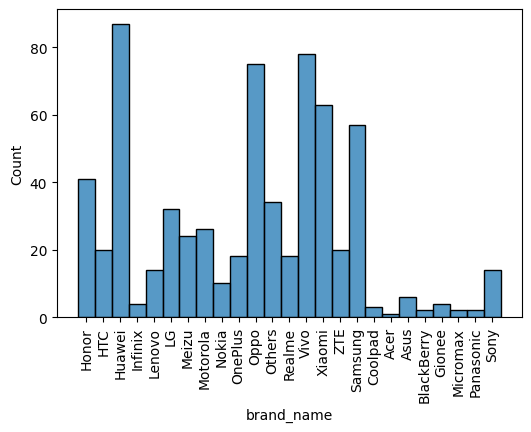

In [70]:
plt.figure(figsize=(6,4))
sns.histplot(data=cdata[cdata['selfie_camera_mp'] > 8], x='brand_name')
plt.xticks(rotation=90);

- There is not a specific pattern for the distribution of devices offering greater than 8 MP selfie cameras across brands.
- Huawei offers the most devices with selfie camera resolution greater than 8 MP.
- Vivo, Oppo, Xiaomi, and Samsung also have more than 50 devices with selfie camera resolution greater than 8 MP.
- Acer has the least devices with selfie camera resolution greater than 8 MP.

7. Which attributes are highly correlated with the normalized price of a used device?

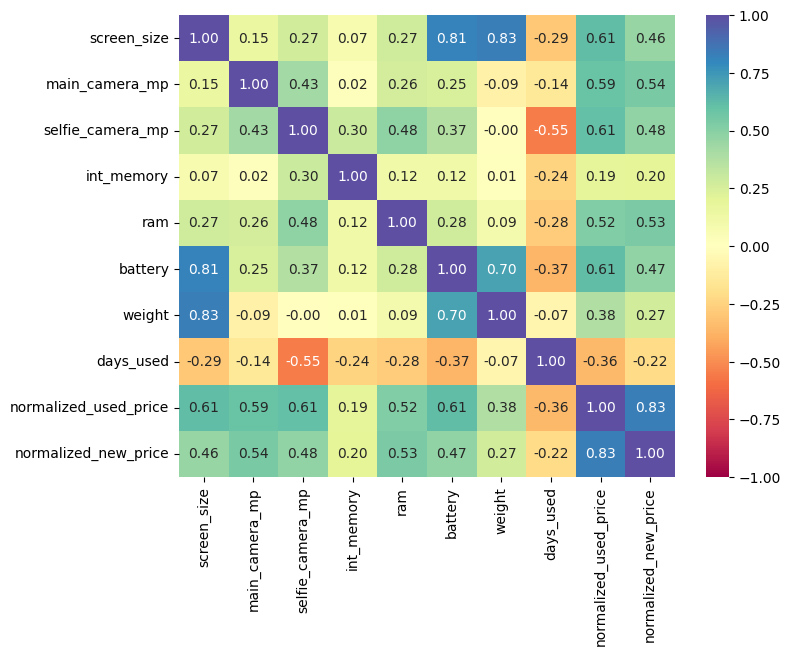

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(cdata_copy.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral');

- Normalized used device price has strong positive correlations with normalized new device price, screen size, selfie camera resolution, and battery capacity. The used price also has relatively strong positive correlations with main camera resolution and ram.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [72]:
# Check missing data again
cdata.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- Main camera resolution, selfie camera resolution, internal memory, ram, battery, and weight have missing values, which needs treatments.

In [73]:
# Check the missing values for selfie camera resolution
cdata.loc[cdata['selfie_camera_mp'].isnull()]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1080     Google  Android        15.32  yes  no            12.2   
1081     Google  Android        12.83  yes  no            12.2   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
1080               NaN        64.0  4.0   3430.0   184.0          2018   
1081               NaN        64.0  4.0   2915.0   148.0          2018   

      days_used  normalized_used_price  normalized_new_price  
1080        475               5.573826              6.865974  
1081        424               4.464988              6.745083

- The two missing values in selfie camera resolution are both related with the Google brand.

In [74]:
# Check the details of Google device
cdata[cdata['brand_name']=='Google']['selfie_camera_mp'].value_counts(dropna=False)

selfie_camera_mp
8.0    12
NaN     2
2.0     1
Name: count, dtype: int64

In [75]:
cdata.loc[cdata['brand_name']=='Google']

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1080     Google  Android        15.32  yes  no            12.2   
1081     Google  Android        12.83  yes  no            12.2   
1082     Google  Android        12.70  yes  no            12.2   
1083     Google  Android        15.24  yes  no            12.2   
1084     Google  Android        12.83  yes  no            12.3   
1085     Google  Android        12.70  yes  no            12.3   
1086     Google  Android        25.45   no  no             8.0   
3187     Google  Android        15.32  yes  no            12.2   
3188     Google  Android        12.88  yes  no            12.2   
3189     Google  Android        15.24  yes  no            12.2   
3190     Google  Android        12.85  yes  no            12.2   
3328     Google  Android        15.32  yes  no            12.2   
3329     Google  Android        12.88  yes  no            12.2   
3330     Google  Android        15.24  yes  no            12.2   
3331     Google  Android        12.85  yes  no            12.2   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
1080               NaN        64.0  4.0   3430.0   184.0          2018   
1081               NaN        64.0  4.0   2915.0   148.0          2018   
1082               8.0        64.0  4.0   2700.0   143.0          2017   
1083               8.0        64.0  4.0   3520.0   175.0          2017   
1084               8.0        32.0  4.0   3450.0   168.0          2016   
1085               8.0        32.0  4.0   2770.0   143.0          2016   
1086               2.0        32.0  4.0   9240.0   517.0          2015   
3187               8.0        64.0  6.0   3700.0   193.0          2019   
3188               8.0        64.0  6.0   2800.0   162.0          2019   
3189               8.0        64.0  4.0   3700.0   167.0          2019   
3190               8.0        64.0  4.0   3000.0   147.0          2019   
3328               8.0        64.0  6.0   3700.0   193.0          2019   
3329               8.0        64.0  6.0   2800.0   162.0          2019   
3330               8.0        64.0  4.0   3700.0   167.0          2019   
3331               8.0        64.0  4.0   3000.0   147.0          2019   

      days_used  normalized_used_price  normalized_new_price  
1080        475               5.573826              6.865974  
1081        424               4.464988              6.745083  
1082        890               4.825028              6.310845  
1083        554               5.247761              6.272367  
1084       1021               5.042586              5.936956  
1085        848               4.565077              5.671810  
1086        584               5.032201              5.826059  
3187        487               4.870146              6.358102  
3188        203               5.153812              6.181362  
3189        318               4.877942              5.692553  
3190        508               4.470610              5.537925  
3328        429               4.600560              6.358102  
3329        464               5.037342              6.181362  
3330        397               4.777778              5.692553  
3331        186               4.745106              5.537925

- It seems only the Google device released in 2015 has selfie camera resolution 2 megapixels. Other devices all have 8 megapixels. Therefore, it is reasonble to impute the missing value with the median value of Google devices' selfie camera resolution.

In [76]:
# Check the median value
cdata[cdata['brand_name']=='Google']['selfie_camera_mp'].median()

8.0

In [77]:
# Impute missing value for selfie camera resolution with the mode value
cdata['selfie_camera_mp'] = cdata['selfie_camera_mp'].fillna(value = cdata[cdata['brand_name']=='Google']['selfie_camera_mp'].median())

In [78]:
# Check the missing data again
cdata.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- Selfie camera resolution has been imputed, next to check internal memory.

In [79]:
cdata.loc[cdata['int_memory'].isnull()==True]

brand_name      os  screen_size   4g  5g  main_camera_mp  \
117       Nokia  Others         5.18  yes  no             0.3   
2035      Nokia  Others         5.18   no  no             5.0   
2064      Nokia  Others         5.18   no  no             0.3   
2092      Nokia  Others         7.62   no  no             5.0   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
117                0.0         NaN  0.02   1200.0    86.5          2019   
2035               0.0         NaN  0.03   1020.0   157.0          2019   
2064               0.0         NaN  0.02   1100.0    78.4          2015   
2092               0.0         NaN  0.02   1010.0   100.0          2013   

      days_used  normalized_used_price  normalized_new_price  
117         234               2.721295              3.688379  
2035        501               2.343727              3.420346  
2064        559               2.587012              3.378611  
2092       1043               3.535728              4.370586

- The missing internal memory values are all associated with Nokia. These devices also have very small ram.

In [80]:
# Check more about the internal memory data for Nokia
cdata.loc[cdata['brand_name']=='Nokia']

brand_name       os  screen_size   4g  5g  main_camera_mp  \
110       Nokia  Android        16.56  yes  no             0.3   
111       Nokia  Android        13.84  yes  no             0.3   
112       Nokia  Android        13.84  yes  no             0.3   
113       Nokia   Others         5.18   no  no             0.3   
114       Nokia   Others         5.18   no  no             0.3   
...         ...      ...          ...  ...  ..             ...   
3384      Nokia  Android        15.29  yes  no            13.0   
3385      Nokia  Android        15.32  yes  no             5.0   
3386      Nokia  Android        15.32  yes  no             5.0   
3387      Nokia   Others         5.28  yes  no             2.0   
3388      Nokia  Android        14.50  yes  no            13.0   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
110                8.0       64.00  3.00   4000.0   200.0          2020   
111                5.0       16.00  2.00   3000.0   180.0          2020   
112                5.0       16.00  2.00   3000.0   180.0          2020   
113                0.0        0.10  0.03   1020.0    90.5          2020   
114                0.0        0.06   NaN   1020.0    91.3          2020   
...                ...         ...   ...      ...     ...           ...   
3384               5.0       32.00  2.00   4000.0   183.0          2019   
3385              20.0       64.00  4.00   3500.0   180.0          2019   
3386               8.0       32.00  3.00   3500.0   180.0          2019   
3387               0.0        0.10  0.03   1500.0   118.0          2019   
3388               5.0       16.00  2.00   3000.0   153.0          2019   

      days_used  normalized_used_price  normalized_new_price  
110         310               4.186012              5.004885  
111         193               3.616309              4.100161  
112         356               4.055430              4.591984  
113         272               2.910174              3.399863  
114         288               2.729159              2.911263  
...         ...                    ...                   ...  
3384        520               4.145671              4.438289  
3385        459               4.789407              5.127292  
3386        417               4.145354              4.950107  
3387        295               3.444576              4.085304  
3388        235               4.022311              4.085808  

[106 rows x 15 columns]

In [81]:
cdata.loc[(cdata['brand_name']=='Nokia') & (cdata['ram']<0.05)]

brand_name      os  screen_size   4g  5g  main_camera_mp  \
113       Nokia  Others         5.18   no  no            0.30   
116       Nokia  Others         5.18   no  no            0.30   
117       Nokia  Others         5.18  yes  no            0.30   
332       Nokia  Others         5.18   no  no            0.30   
333       Nokia  Others         5.18   no  no            0.30   
336       Nokia  Others         5.18  yes  no            0.30   
2035      Nokia  Others         5.18   no  no            5.00   
2044      Nokia  Others         5.18  yes  no            2.00   
2049      Nokia  Others         5.18  yes  no            2.00   
2052      Nokia  Others         5.18   no  no            2.00   
2057      Nokia  Others         5.18   no  no            2.00   
2058      Nokia  Others         5.18   no  no            0.30   
2060      Nokia  Others         5.28   no  no            2.00   
2061      Nokia  Others         5.28   no  no            2.00   
2062      Nokia  Others         5.18   no  no            2.00   
2063      Nokia  Others         5.18   no  no            2.00   
2064      Nokia  Others         5.18   no  no            0.30   
2065      Nokia  Others         5.18   no  no            0.30   
2074      Nokia  Others         5.28   no  no            2.00   
2075      Nokia  Others         5.28   no  no            2.00   
2083      Nokia  Others         5.28   no  no            1.30   
2084      Nokia  Others         5.18   no  no            2.00   
2091      Nokia  Others         7.62   no  no            5.00   
2092      Nokia  Others         7.62   no  no            5.00   
2093      Nokia  Others         5.28   no  no            2.00   
2094      Nokia  Others         5.28   no  no            2.00   
2095      Nokia  Others         5.18   no  no            5.00   
2098      Nokia  Others         5.18   no  no            1.30   
2099      Nokia  Others         5.18   no  no            5.00   
2102      Nokia  Others         7.62   no  no            3.15   
2103      Nokia  Others         5.18   no  no            2.00   
2106      Nokia  Others         5.18   no  no            3.15   
2107      Nokia  Others         7.62   no  no            2.00   
3246      Nokia  Others         5.28  yes  no            2.00   
3387      Nokia  Others         5.28  yes  no            2.00   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
113                0.0        0.10  0.03   1020.0    90.5          2020   
116                0.0        0.06  0.02   1200.0    88.2          2020   
117                0.0         NaN  0.02   1200.0    86.5          2019   
332                0.0        0.06  0.03   1020.0    90.5          2020   
333                0.0        0.10  0.03   1020.0    91.3          2020   
336                0.0        0.10  0.03   1200.0    86.5          2019   
2035               0.0         NaN  0.03   1020.0   157.0          2019   
2044               0.0        0.10  0.02   1100.0   117.0          2018   
2049               0.0        0.06  0.02   1200.0    88.1          2018   
2052               0.0        0.10  0.02   1200.0    88.2          2017   
2057               0.0        0.10  0.02   1000.0   160.0          2017   
2058               0.0        0.06  0.02      NaN    81.0          2016   
2060               0.0        0.06  0.02   1200.0    91.8          2015   
2061               0.0        0.06  0.03   1200.0    91.8          2015   
2062               0.0        0.10  0.02   1100.0    79.0          2015   
2063               0.0        0.06  0.03   1100.0    79.0          2015   
2064               0.0         NaN  0.02   1100.0    78.4          2015   
2065               0.0        0.06  0.02   1100.0    78.6          2015   
2074               0.0        0.10  0.02   1200.0    99.8          2014   
2075               0.0        0.10  0.03   1200.0   100.6          2014   
2083               0.0        0.06  0.03   1830.0    89.3          2014   
2084          

- For Nokia devices with ram is either 0.03 or 0.02 GB, the internal memory is either 0.1 or 0.06 GB. Therefore, we impute the missing values of internal memory with the median value of Nokia devices with ram smaller than 0.03.

In [82]:
# Impute the missing value
cdata['int_memory'] = cdata['int_memory'].fillna(value = cdata.loc[(cdata['brand_name']=='Nokia') & (cdata['ram']<=0.03)]['int_memory'].median())

In [83]:
# Check the missing data again
cdata.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- Internal memory has been imputed, next is to treat ram

In [84]:
cdata.loc[cdata['ram'].isnull()==True]

brand_name      os  screen_size  4g  5g  main_camera_mp  \
114       Nokia  Others         5.18  no  no             0.3   
335       Nokia  Others         5.18  no  no             0.3   
2059      Nokia  Others         5.18  no  no             0.3   
2090      Nokia  Others         7.62  no  no             5.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
114                0.0        0.06  NaN   1020.0    91.3          2020   
335                0.0        0.10  NaN   1200.0    88.2          2020   
2059               0.0        0.06  NaN      NaN    82.6          2016   
2090               0.0        0.06  NaN   1200.0   111.4          2013   

      days_used  normalized_used_price  normalized_new_price  
114         288               2.729159              2.911263  
335         327               3.062924              3.689129  
2059       1023               2.765060              3.657905  
2090       1001               3.827771              4.605770

- The ram missing values are also only associated with Nokia devices that have small internal memory sizes.

In [85]:
# Check more about Nokia devices with internal memory size smaller than 0.06
cdata.loc[(cdata['brand_name']=='Nokia') & (cdata['int_memory']<=0.06)]

brand_name      os  screen_size   4g  5g  main_camera_mp  \
114       Nokia  Others         5.18   no  no            0.30   
116       Nokia  Others         5.18   no  no            0.30   
332       Nokia  Others         5.18   no  no            0.30   
2049      Nokia  Others         5.18  yes  no            2.00   
2058      Nokia  Others         5.18   no  no            0.30   
2059      Nokia  Others         5.18   no  no            0.30   
2060      Nokia  Others         5.28   no  no            2.00   
2061      Nokia  Others         5.28   no  no            2.00   
2063      Nokia  Others         5.18   no  no            2.00   
2065      Nokia  Others         5.18   no  no            0.30   
2083      Nokia  Others         5.28   no  no            1.30   
2090      Nokia  Others         7.62   no  no            5.00   
2093      Nokia  Others         5.28   no  no            2.00   
2094      Nokia  Others         5.28   no  no            2.00   
2095      Nokia  Others         5.18   no  no            5.00   
2098      Nokia  Others         5.18   no  no            1.30   
2102      Nokia  Others         7.62   no  no            3.15   
3246      Nokia  Others         5.28  yes  no            2.00   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
114                0.0        0.06   NaN   1020.0    91.3          2020   
116                0.0        0.06  0.02   1200.0    88.2          2020   
332                0.0        0.06  0.03   1020.0    90.5          2020   
2049               0.0        0.06  0.02   1200.0    88.1          2018   
2058               0.0        0.06  0.02      NaN    81.0          2016   
2059               0.0        0.06   NaN      NaN    82.6          2016   
2060               0.0        0.06  0.02   1200.0    91.8          2015   
2061               0.0        0.06  0.03   1200.0    91.8          2015   
2063               0.0        0.06  0.03   1100.0    79.0          2015   
2065               0.0        0.06  0.02   1100.0    78.6          2015   
2083               0.0        0.06  0.03   1830.0    89.3          2014   
2090               0.0        0.06   NaN   1200.0   111.4          2013   
2093               0.0        0.06  0.03   1200.0   101.3          2013   
2094               0.0        0.06  0.03   1200.0   101.0          2013   
2095               0.0        0.06  0.03   1200.0   101.1          2013   
2098               0.0        0.06  0.02   1020.0    89.6          2013   
2102               0.0        0.06  0.02   1200.0    98.2          2013   
3246               0.0        0.06  0.03   1500.0   118.0          2019   

      days_used  normalized_used_price  normalized_new_price  
114         288               2.729159              2.911263  
116         266               3.370738              3.699077  
332         322               2.519308              3.386422  
2049        582               3.559909              4.611252  
2058        815               2.718660              3.374511  
2059       1023               2.765060              3.657905  
2060        867               2.934920              4.219655  
2061        772               3.285412              4.247638  
2063        798               3.031099              3.700808  
2065        682               2.935451              3.401197  
2083        717               3.541829              4.103139  
2090       1001               3.827771              4.605770  
2093        893               3.418382              4.092510  
2094        782               3.292126              4.081766  
2095        863               4.391977              4.943284  
2098        955               4.035479              4.076011  
2102        668               3.532518              4.382527  
3246        339               3.417071              4.085304

- The ram size for Nokia devices having small internal memory is either 0.02 ot 0.03. So impute the missing value with median ram size for Nokia devices with small internal memory.

In [86]:
# Impute the missing value
cdata['ram'] = cdata['ram'].fillna(value = cdata.loc[(cdata['brand_name']=='Nokia') & (cdata['int_memory']<=0.06)]['ram'].median())

In [87]:
# Check the missing data again
cdata.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- RAM is imputed, next move to battery.

In [88]:
cdata.loc[cdata['battery'].isnull()==True]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1829      Meizu  Android        12.83  yes  no            13.0   
1831      Meizu  Android        12.83  yes  no            20.7   
1832      Meizu  Android        13.61  yes  no            20.7   
1962  Microsoft  Windows        25.55   no  no             5.0   
2058      Nokia   Others         5.18   no  no             0.3   
2059      Nokia   Others         5.18   no  no             0.3   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
1829               5.0       16.00  4.00      NaN   145.0          2014   
1831               5.0       16.00  4.00      NaN   158.0          2014   
1832               2.0       16.00  4.00      NaN   147.0          2014   
1962               3.5       32.00  4.00      NaN   675.9          2013   
2058               0.0        0.06  0.02      NaN    81.0          2016   
2059               0.0        0.06  0.03      NaN    82.6          2016   

      days_used  normalized_used_price  normalized_new_price  
1829        986               4.177919              4.863604  
1831       1043               4.878855              5.990639  
1832       1007               4.742320              5.826118  
1962        931               5.230574              5.802753  
2058        815               2.718660              3.374511  
2059       1023               2.765060              3.657905

- The missing values in battery is related with three different brands.

In [89]:
# Check more data about Meizu
cdata.loc[cdata['brand_name']=='Meizu']

brand_name       os  screen_size   4g   5g  main_camera_mp  \
97        Meizu  Android        15.39  yes  yes             NaN   
98        Meizu  Android        15.37  yes   no             NaN   
99        Meizu  Android        15.37  yes   no             NaN   
100       Meizu  Android        15.29  yes   no             NaN   
101       Meizu  Android        15.29  yes   no             NaN   
...         ...      ...          ...  ...  ...             ...   
1831      Meizu  Android        12.83  yes   no            20.7   
1832      Meizu  Android        13.61  yes   no            20.7   
1833      Meizu  Android        12.73   no   no             8.0   
3223      Meizu  Android        15.39  yes  yes             NaN   
3364      Meizu  Android        15.39  yes  yes             NaN   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
97                20.0       128.0  8.0   4500.0   199.0          2020   
98                16.0       128.0  6.0   4500.0   183.0          2019   
99                 8.0        32.0  2.0   4000.0   184.0          2019   
100               20.0       128.0  6.0   3600.0   166.0          2019   
101               16.0        64.0  6.0   4000.0   165.0          2019   
...                ...         ...  ...      ...     ...           ...   
1831               5.0        16.0  4.0      NaN   158.0          2014   
1832               2.0        16.0  4.0      NaN   147.0          2014   
1833               2.0        16.0  4.0   2400.0   143.0          2013   
3223              20.0       128.0  8.0   4500.0   219.0          2020   
3364              20.0       128.0  8.0   4500.0   219.0          2020   

      days_used  normalized_used_price  normalized_new_price  
97          186               5.167867              6.272028  
98          449               4.665512              5.526329  
99          190               4.290185              5.195177  
100         459               4.721085              5.830679  
101         517               4.842296              5.388661  
...         ...                    ...                   ...  
1831       1043               4.878855              5.990639  
1832       1007               4.742320              5.826118  
1833        878               4.688960              5.914503  
3223        261               4.822135              6.397080  
3364        139               5.569260              6.397080  

[62 rows x 15 columns]

In [90]:
cdata.loc[cdata['brand_name']=='Meizu']['battery'].value_counts(dropna=False)

battery
3060.0    9
3000.0    7
4500.0    6
4000.0    6
3600.0    5
NaN       3
3070.0    2
3400.0    2
3500.0    2
3150.0    2
3095.0    2
3100.0    2
3140.0    1
3260.0    1
2560.0    1
2500.0    1
3050.0    1
3235.0    1
2760.0    1
3360.0    1
3300.0    1
3570.0    1
3010.0    1
3200.0    1
3210.0    1
2400.0    1
Name: count, dtype: int64

- The battery size for Meizu varies largely.

In [91]:
# Check more about the Microsoft
cdata.loc[cdata['brand_name']=='Microsoft']

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1941  Microsoft  Windows        12.70  yes  no             8.0   
1942  Microsoft  Windows        12.88  yes  no            20.0   
1943  Microsoft  Windows        12.88  yes  no            20.0   
1944  Microsoft  Windows        12.75  yes  no            20.0   
1945  Microsoft  Windows        12.75  yes  no            20.0   
1946  Microsoft  Windows        10.34  yes  no             5.0   
1947  Microsoft  Windows        12.70   no  no             8.0   
1948  Microsoft  Windows        10.16   no  no             2.0   
1949  Microsoft  Windows        12.88  yes  no            13.0   
1950  Microsoft  Windows        12.88  yes  no            13.0   
1951  Microsoft  Windows        12.88   no  no            13.0   
1952  Microsoft  Windows        12.88   no  no            13.0   
1953  Microsoft  Windows        12.70  yes  no             8.0   
1954  Microsoft  Windows        12.70  yes  no             8.0   
1955  Microsoft  Windows        12.70   no  no             8.0   
1956  Microsoft  Windows        10.16   no  no             5.0   
1957  Microsoft  Windows        10.16   no  no             5.0   
1958  Microsoft  Windows        10.16   no  no             2.0   
1959  Microsoft  Windows        10.16   no  no             2.0   
1960  Microsoft  Windows        12.70   no  no             5.0   
1961  Microsoft  Windows        12.70   no  no             5.0   
1962  Microsoft  Windows        25.55   no  no             5.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
1941               5.0        16.0  4.0   2000.0   122.0          2016   
1942               5.0        32.0  4.0   3340.0   165.0          2015   
1943               5.0        32.0  4.0   3340.0   165.0          2015   
1944               5.0        32.0  4.0   3000.0   150.0          2015   
1945               5.0        32.0  4.0   3000.0   150.0          2015   
1946               2.0        32.0  4.0   2100.0   141.9          2015   
1947               5.0        32.0  4.0   2200.0   152.0          2015   
1948               0.3        32.0  4.0   1500.0   127.9          2015   
1949               5.0        32.0  4.0   3000.0   171.0          2015   
1950               5.0        32.0  4.0   3000.0   171.0          2015   
1951               5.0        32.0  4.0   3000.0   171.0          2015   
1952               5.0        32.0  4.0   3000.0   171.0          2015   
1953               1.0        32.0  4.0   2500.0   145.0          2015   
1954               1.0        32.0  4.0   2500.0   145.0          2015   
1955               1.0        32.0  4.0   2500.0   145.0          2015   
1956               0.3        32.0  4.0   1560.0   136.3          2015   
1957               0.3        32.0  4.0   1560.0   136.3          2015   
1958               0.3        32.0  4.0   1560.0   134.1          2015   
1959               0.3        32.0  4.0   1560.0   134.1          2015   
1960               5.0        32.0  4.0   1905.0   146.0          2014   
1961               5.0        32.0  4.0   1905.0   146.0          2014   
1962               3.5        32.0  4.0      NaN   675.9          2013   

      days_used  normalized_used_price  normalized_new_price  
1941        961               4.033532              5.008900  
1942        931               4.959553              5.855559  
1943        820               4.910152              5.853495  
1944        692               4.844738              5.632358  
1945        751               4.684443              5.635896  
1946        790               3.818591              4.498364  
1947        965               3.964615              4.611848  
1948        890               3.385745              4.237145  
1949        823               4.428672              5.306335  
1950        956               4.195245              5.297117  
1951        949               4.249352              5.130786  
1952        937            

In [92]:
cdata.loc[cdata['brand_name']=='Microsoft']['battery'].value_counts(dropna=False)

battery
3000.0    6
1560.0    4
2500.0    3
3340.0    2
1905.0    2
2000.0    1
2100.0    1
2200.0    1
1500.0    1
NaN       1
Name: count, dtype: int64

In [93]:
# Check more about data with Nokia
cdata.loc[cdata['brand_name']=='Nokia']['battery'].value_counts(dropna=False)

battery
1200.0    18
3000.0    13
1020.0     7
3500.0     7
4000.0     6
2000.0     6
1830.0     6
1100.0     5
1500.0     4
1430.0     4
3060.0     3
2200.0     3
3400.0     2
2420.0     2
NaN        2
1110.0     2
4500.0     2
3090.0     1
2630.0     1
1000.0     1
2150.0     1
3800.0     1
5300.0     1
3260.0     1
2990.0     1
1800.0     1
2970.0     1
2500.0     1
3320.0     1
1010.0     1
4100.0     1
Name: count, dtype: int64

- The battery size for Microsoft and Nokia also varies largely.
- Since it seems not to have a pattern in battery for Meizu, Microsoft, and Nokia, we can impute the missing values for battery with the median values of each brand.

In [94]:
# Check the median battery size for three brands
cdata.groupby('brand_name')['battery'].median()[['Meizu','Microsoft','Nokia']]

brand_name
Meizu        3150.0
Microsoft    2500.0
Nokia        2000.0
Name: battery, dtype: float64

In [95]:
# Impute the missing value for battery
cdata['battery'] = cdata['battery'].fillna(value = cdata.groupby('brand_name')['battery'].transform('median'))

In [96]:
cdata.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        0
battery                    0
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- Battery has been imputed, next treat weight.

In [97]:
cdata.loc[cdata['weight'].isnull()==True]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3002       XOLO  Android        12.70  yes  no            13.0   
3003       XOLO  Android        12.83  yes  no             8.0   
3004       XOLO  Android        12.70   no  no             8.0   
3005       XOLO  Android        10.29   no  no             5.0   
3006       XOLO  Android        12.70   no  no             5.0   
3007       XOLO  Windows        12.70   no  no             8.0   
3008       XOLO  Android        12.70   no  no             8.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3002               5.0        32.0  4.0   2400.0     NaN          2015   
3003               5.0        16.0  4.0   3200.0     NaN          2015   
3004               2.0        32.0  4.0   2100.0     NaN          2015   
3005               0.3        32.0  4.0   1800.0     NaN          2015   
3006               0.3        16.0  4.0   2500.0     NaN          2015   
3007               2.0        32.0  4.0   2200.0     NaN          2015   
3008               5.0        32.0  4.0   2500.0     NaN          2015   

      days_used  normalized_used_price  normalized_new_price  
3002        576               4.165890              4.930437  
3003        800               4.282068              5.189228  
3004        878               3.879706              4.081090  
3005       1036               3.823847              4.396053  
3006        679               3.837084              4.347176  
3007        838               3.707210              4.791733  
3008       1045               4.184642              4.785406

- The missing values for weight are all related with XOLO brand devices.

In [98]:
# Check more about XOLO
cdata.loc[cdata['brand_name']=='XOLO']

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3002       XOLO  Android        12.70  yes  no           13.00   
3003       XOLO  Android        12.83  yes  no            8.00   
3004       XOLO  Android        12.70   no  no            8.00   
3005       XOLO  Android        10.29   no  no            5.00   
3006       XOLO  Android        12.70   no  no            5.00   
3007       XOLO  Windows        12.70   no  no            8.00   
3008       XOLO  Android        12.70   no  no            8.00   
3009       XOLO  Android        12.83   no  no           13.00   
3010       XOLO  Android        12.70   no  no            8.00   
3011       XOLO  Android        12.70   no  no            8.00   
3012       XOLO  Android        12.70   no  no           13.00   
3013       XOLO  Android        10.29   no  no            5.00   
3014       XOLO  Android        12.67   no  no            8.00   
3015       XOLO  Android        12.70   no  no           13.00   
3016       XOLO  Android        12.70   no  no           13.00   
3017       XOLO  Android        12.70   no  no            8.00   
3018       XOLO  Windows        10.34   no  no            8.00   
3019       XOLO  Android        10.16   no  no            3.15   
3020       XOLO  Android        12.70   no  no            8.00   
3021       XOLO  Android        10.16   no  no            5.00   
3022       XOLO  Android        15.24   no  no            8.00   
3023       XOLO  Android        10.16   no  no            5.00   
3024       XOLO  Android        12.70   no  no            8.00   
3025       XOLO  Android        12.70   no  no            8.00   
3026       XOLO  Android        10.29   no  no            8.00   
3027       XOLO  Android        12.88   no  no           13.00   
3028       XOLO  Android        12.70   no  no            5.00   
3029       XOLO  Android        10.24  yes  no            8.00   
3030       XOLO  Android        17.78   no  no            5.00   
3031       XOLO  Android        10.16   no  no            5.00   
3032       XOLO  Android        10.29   no  no            8.00   
3033       XOLO  Android        10.16   no  no            5.00   
3034       XOLO  Android        12.83   no  no           13.00   
3035       XOLO  Android        10.34   no  no            8.00   
3036       XOLO  Android        10.29   no  no            5.00   
3037       XOLO  Android        10.16   no  no            3.15   
3038       XOLO  Android        10.29   no  no            8.00   
3039       XOLO  Android        17.78   no  no            2.00   
3040       XOLO  Android        20.32   no  no            2.00   
3041       XOLO  Android        12.70   no  no           13.00   
3042       XOLO  Android        10.16   no  no            5.00   
3043       XOLO  Android        10.34   no  no            8.00   
3044       XOLO  Android        10.29   no  no            5.00   
3045       XOLO  Android        10.34   no  no            8.00   
3046       XOLO  Android        10.24   no  no            5.00   
3047       XOLO  Android         7.75   no  no            5.00   
3048       XOLO  Android        12.70   no  no            8.00   
3049       XOLO  Android        10.29   no  no            8.00   
3050       XOLO  Android        10.29   no  no            5.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3002              5.00        32.0  4.0   2400.0     NaN          2015   
3003              5.00        16.0  4.0   3200.0     NaN          2015   
3004              2.00        32.0  4.0   2100.0     NaN          2015   
3005              0.30        32.0  4.0   1800.0     NaN          2015   
3006              0.30        16.0  4.0   2500.0     NaN          2015   
3007              2.00        32.0  4.0   2200.0     NaN          2015   
3008              5.00        32.0  4.0   2500.0     NaN          2015   
3009              2.00        32.0  4.0   2600.0  120.00          2014   
3010              2.00        32.0  4.

In [99]:
cdata.loc[cdata['brand_name']=='XOLO']['weight'].value_counts(dropna=False)

weight
120.00    19
NaN        7
148.85     4
140.00     2
143.50     2
151.30     2
480.00     1
132.00     1
150.00     1
147.70     1
167.00     1
158.00     1
138.00     1
338.00     1
180.00     1
116.00     1
320.00     1
100.00     1
171.10     1
Name: count, dtype: int64

- It doesn't seem to have any pattern in the device weight for XOLO brand, and the XOLO devices' weight is mostly around 120 grams. So we can impute the missing value of weight using the median weight of XOLO devices.

In [100]:
# Check the median value
cdata[cdata['brand_name']=='XOLO']['weight'].median()

126.0

In [101]:
# Impute the missing value
cdata['weight'] = cdata['weight'].fillna(value = cdata[cdata['brand_name']=='XOLO']['weight'].median())

In [102]:
# Check the missing data again
cdata.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        0
battery                    0
weight                     0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- Finally let's treat the missing values in main camera resolution.

In [103]:
# Check the missing values in main camera resolution
cdata.loc[cdata['main_camera_mp'].isnull()==True]['brand_name'].value_counts()

brand_name
Realme        36
Xiaomi        23
Oppo          20
Motorola      18
OnePlus       17
Meizu         15
Vivo          14
Infinix       10
Sony           7
ZTE            4
Asus           4
BlackBerry     4
Coolpad        3
Lava           2
Panasonic      2
Name: count, dtype: int64

- The missing data in main camera resolution exist in different brands.

In [104]:
cdata.loc[cdata['main_camera_mp'].isnull()==True]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59      Infinix  Android        17.32  yes  no             NaN   
60      Infinix  Android        15.39  yes  no             NaN   
61      Infinix  Android        15.39  yes  no             NaN   
62      Infinix  Android        15.39  yes  no             NaN   
63      Infinix  Android        15.29  yes  no             NaN   
...         ...      ...          ...  ...  ..             ...   
3411     Realme  Android        15.34  yes  no             NaN   
3412     Realme  Android        15.32  yes  no             NaN   
3413     Realme  Android        15.32  yes  no             NaN   
3448       Asus  Android        16.74  yes  no             NaN   
3449       Asus  Android        15.34  yes  no             NaN   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                 8.0        32.0  2.0   6000.0   209.0          2020   
60                 8.0        64.0  4.0   5000.0   185.0          2020   
61                 8.0        32.0  2.0   5000.0   185.0          2020   
62                16.0        32.0  3.0   4000.0   178.0          2019   
63                16.0        32.0  2.0   4000.0   165.0          2019   
...                ...         ...  ...      ...     ...           ...   
3411              16.0        64.0  4.0   4000.0   183.0          2019   
3412              16.0        64.0  4.0   4035.0   184.0          2019   
3413              25.0        64.0  4.0   4045.0   172.0          2019   
3448              24.0       128.0  8.0   6000.0   240.0          2019   
3449               8.0        64.0  6.0   5000.0   190.0          2019   

      days_used  normalized_used_price  normalized_new_price  
59          245               4.282068              4.597642  
60          173               4.363608              4.711780  
61          256               4.181439              4.505460  
62          316               4.555244              4.602166  
63          468               4.416670              4.871297  
...         ...                    ...                   ...  
3411        503               4.570475              5.159974  
3412        433               4.521027              5.074424  
3413        288               4.778199              4.966753  
3448        325               5.715316              7.059317  
3449        232               4.492337              6.483872  

[179 rows x 15 columns]

- Since it is hard to find any patterns in the main camera resolution among different brands, we use median values of main camera resolution of each brand to impute the missing values.

In [105]:
# Impute missing values
cdata['main_camera_mp'] = cdata['main_camera_mp'].fillna(value = cdata.groupby('brand_name')['main_camera_mp'].transform('median'))

In [106]:
# Check the missing data again
cdata.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

- There are 10 missing values remaining in main camera resolution.

In [107]:
cdata.loc[cdata['main_camera_mp'].isnull()==True]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59     Infinix  Android        17.32  yes  no             NaN   
60     Infinix  Android        15.39  yes  no             NaN   
61     Infinix  Android        15.39  yes  no             NaN   
62     Infinix  Android        15.39  yes  no             NaN   
63     Infinix  Android        15.29  yes  no             NaN   
278    Infinix  Android        17.32  yes  no             NaN   
279    Infinix  Android        15.39  yes  no             NaN   
280    Infinix  Android        15.39  yes  no             NaN   
281    Infinix  Android        15.39  yes  no             NaN   
282    Infinix  Android        15.29  yes  no             NaN   

     selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                8.0        32.0  2.0   6000.0   209.0          2020   
60                8.0        64.0  4.0   5000.0   185.0          2020   
61                8.0        32.0  2.0   5000.0   185.0          2020   
62               16.0        32.0  3.0   4000.0   178.0          2019   
63               16.0        32.0  2.0   4000.0   165.0          2019   
278               8.0        32.0  2.0   6000.0   209.0          2020   
279               8.0        64.0  4.0   5000.0   185.0          2020   
280               8.0        32.0  2.0   5000.0   185.0          2020   
281              16.0        32.0  3.0   4000.0   178.0          2019   
282              16.0        32.0  2.0   4000.0   165.0          2019   

     days_used  normalized_used_price  normalized_new_price  
59         245               4.282068              4.597642  
60         173               4.363608              4.711780  
61         256               4.181439              4.505460  
62         316               4.555244              4.602166  
63         468               4.416670              4.871297  
278        320               4.405133              4.605370  
279        173               4.495913              4.702115  
280        329               4.370713              4.487287  
281        356               4.417997              4.605970  
282        497               4.423289              4.866072

- The remaining missing values all belong to Infinix brand.

In [108]:
cdata[cdata['brand_name'] == 'Infinix']

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59     Infinix  Android        17.32  yes  no             NaN   
60     Infinix  Android        15.39  yes  no             NaN   
61     Infinix  Android        15.39  yes  no             NaN   
62     Infinix  Android        15.39  yes  no             NaN   
63     Infinix  Android        15.29  yes  no             NaN   
278    Infinix  Android        17.32  yes  no             NaN   
279    Infinix  Android        15.39  yes  no             NaN   
280    Infinix  Android        15.39  yes  no             NaN   
281    Infinix  Android        15.39  yes  no             NaN   
282    Infinix  Android        15.29  yes  no             NaN   

     selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                8.0        32.0  2.0   6000.0   209.0          2020   
60                8.0        64.0  4.0   5000.0   185.0          2020   
61                8.0        32.0  2.0   5000.0   185.0          2020   
62               16.0        32.0  3.0   4000.0   178.0          2019   
63               16.0        32.0  2.0   4000.0   165.0          2019   
278               8.0        32.0  2.0   6000.0   209.0          2020   
279               8.0        64.0  4.0   5000.0   185.0          2020   
280               8.0        32.0  2.0   5000.0   185.0          2020   
281              16.0        32.0  3.0   4000.0   178.0          2019   
282              16.0        32.0  2.0   4000.0   165.0          2019   

     days_used  normalized_used_price  normalized_new_price  
59         245               4.282068              4.597642  
60         173               4.363608              4.711780  
61         256               4.181439              4.505460  
62         316               4.555244              4.602166  
63         468               4.416670              4.871297  
278        320               4.405133              4.605370  
279        173               4.495913              4.702115  
280        329               4.370713              4.487287  
281        356               4.417997              4.605970  
282        497               4.423289              4.866072

-  Since all the data of the main camera resolution for the brand Infinix are missing, and there are only 10 data. To prepare the data for linear regression model, we can impute these missing values by dropping them.

In [109]:
cdata = cdata.drop(cdata[cdata['brand_name'] == 'Infinix'].index, axis=0)

In [110]:
# Check the missing data again
cdata.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- Now the missing values have all been treated.

### Outlier detection and treatment

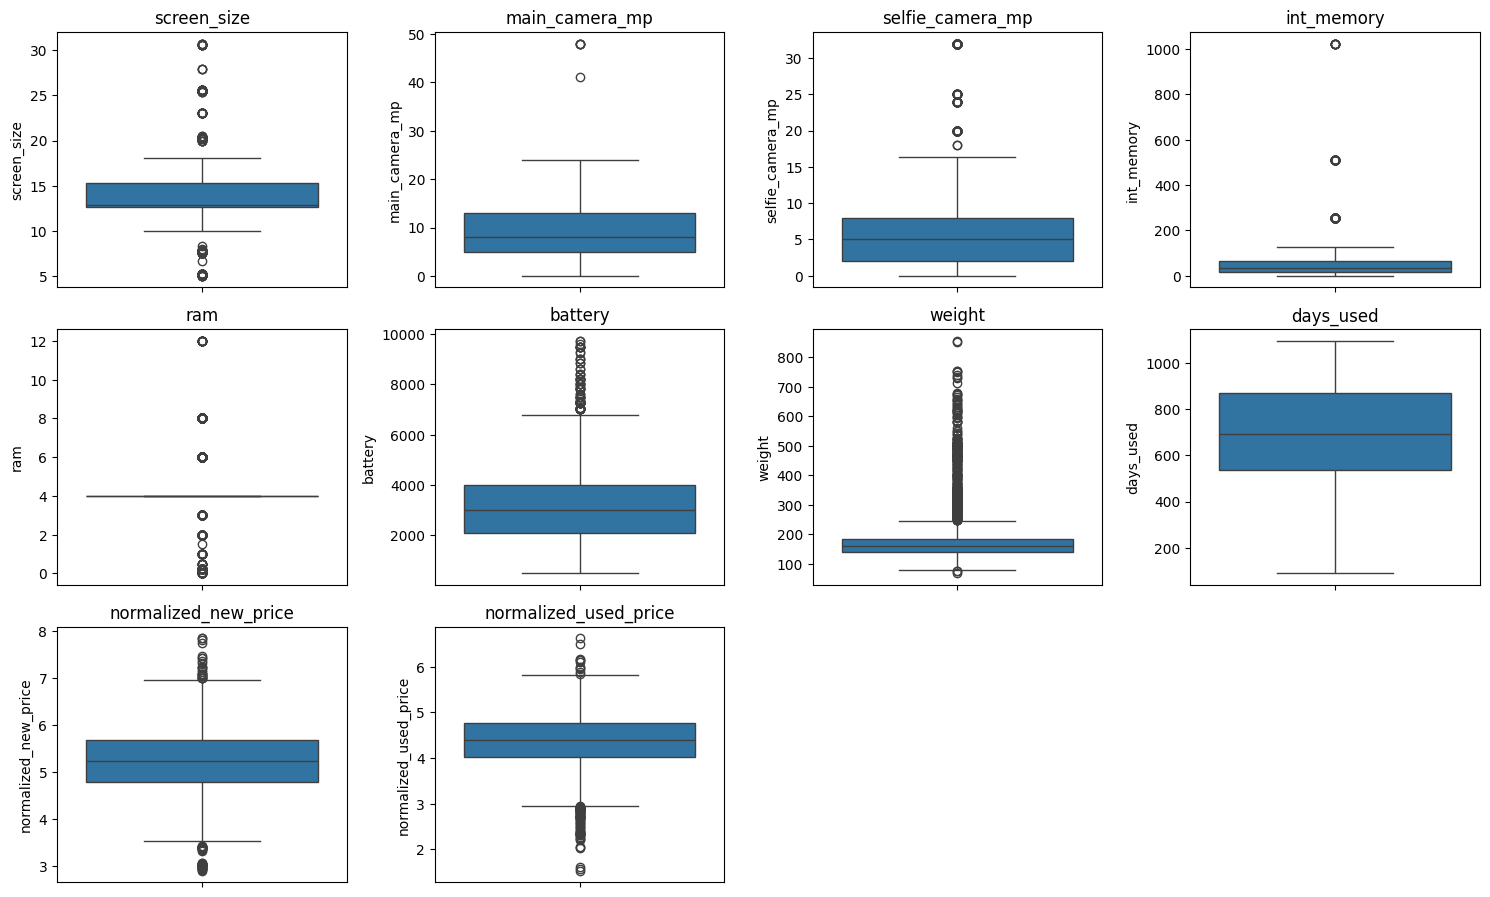

In [111]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
                   'days_used', 'normalized_new_price', 'normalized_used_price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(cdata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [112]:
# Check the percentage of outliers in the data
Q1 = cdata[numeric_columns].quantile(0.25)
Q3 = cdata[numeric_columns].quantile(0.75)

IQR = Q3-Q1
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

((cdata[numeric_columns] < lower_whisker) | (cdata[numeric_columns] > upper_whisker)).sum()/cdata.shape[0] * 100

screen_size              13.066202
main_camera_mp            0.145180
selfie_camera_mp          6.416957
int_memory                4.006969
ram                      18.321719
battery                   2.235772
weight                   10.685250
days_used                 0.000000
normalized_new_price      1.916376
normalized_used_price     2.468060
dtype: float64

- The outliers in each data column are relatively large, except for main camera resolution.

In [113]:
# Check outliers in screen size
cdata.loc[(cdata['screen_size'] < lower_whisker['screen_size'])  | (cdata['screen_size'] > upper_whisker['screen_size'])]

brand_name       os  screen_size   4g   5g  main_camera_mp  \
3         Honor  Android        25.50  yes  yes           13.00   
19        Honor  Android        25.43  yes   no            5.00   
20        Honor  Android        20.32  yes   no            8.00   
21       Others  Android        20.32   no   no            8.00   
31       Huawei  Android        20.32  yes   no            5.00   
...         ...      ...          ...  ...  ...             ...   
3185        ZTE  Android         7.75   no   no            3.15   
3207     Huawei  Android        20.32  yes  yes           10.50   
3246      Nokia   Others         5.28  yes   no            2.00   
3348     Huawei  Android        20.32  yes  yes           10.50   
3387      Nokia   Others         5.28  yes   no            2.00   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
3                  8.0       64.00  6.00   7250.0   480.0          2020   
19                 2.0       32.00  3.00   5100.0   173.0          2019   
20                 8.0       32.00  3.00   5100.0   173.0          2019   
21                 0.3       16.00  1.00   5680.0   453.6          2013   
31                 2.0       16.00  2.00   5100.0   310.0          2020   
...                ...         ...   ...      ...     ...           ...   
3185               1.0       16.00  4.00   1500.0   140.0          2013   
3207              16.0      512.00  8.00   4500.0   300.0          2020   
3246               0.0        0.06  0.03   1500.0   118.0          2019   
3348              16.0      512.00  8.00   4500.0   300.0          2020   
3387               0.0        0.10  0.03   1500.0   118.0          2019   

      days_used  normalized_used_price  normalized_new_price  
3           345               5.135387              5.630961  
19          266               4.267878              5.517051  
20          321               4.556295              5.304001  
21          933               4.452136              5.484382  
31          231               4.170534              4.598246  
...         ...                    ...                   ...  
3185       1003               3.767460              5.008566  
3207        248               6.500448              7.847841  
3246        339               3.417071              4.085304  
3348        129               5.959251              7.847841  
3387        295               3.444576              4.085304  

[450 rows x 15 columns]

In [114]:
cdata.loc[(cdata['screen_size'] < lower_whisker['screen_size'])  | (cdata['screen_size'] > upper_whisker['screen_size'])]['brand_name'].value_counts()

brand_name
Others        84
Samsung       79
Huawei        40
Nokia         40
LG            33
Lenovo        31
Alcatel       24
Micromax      20
Apple         15
Asus          15
Celkon        14
Acer          11
Honor          8
Sony           7
BlackBerry     6
Spice          5
Karbonn        3
Xiaomi         3
Gionee         2
HTC            2
Lava           2
XOLO           2
Google         1
Microsoft      1
Motorola       1
ZTE            1
Name: count, dtype: int64

- There are many outliers in the screen size data, and the outliers exist in different brands without any patterns. So we decide not to impute the outliers in screen size.

In [115]:
# Check outliers in main camera resolution
cdata.loc[(cdata['main_camera_mp'] < lower_whisker['main_camera_mp'])  | (cdata['main_camera_mp'] > upper_whisker['main_camera_mp'])]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
210         ZTE  Android        16.89  yes  no            48.0   
215         ZTE  Android        16.89  yes  no            48.0   
2097      Nokia  Windows        10.29  yes  no            41.0   
3240   Motorola  Android        15.34  yes  no            48.0   
3381   Motorola  Android        15.34  yes  no            48.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
210               16.0       128.0  8.0   5000.0   215.0          2019   
215               16.0        64.0  6.0   5000.0   215.0          2019   
2097               1.2        32.0  4.0   2000.0   158.0          2013   
3240              25.0       128.0  4.0   3600.0   165.0          2019   
3381              25.0       128.0  4.0   3600.0   165.0          2019   

      days_used  normalized_used_price  normalized_new_price  
210         336               5.668052              6.708780  
215         506               5.263726              6.217723  
2097        988               5.105097              5.989287  
3240        371               5.325933              5.541224  
3381        422               5.331027              5.541224

- There are only five outliers in the main camera resolution data. We can impute them. But we need to first check them in more details.

In [116]:
# Check ZTE
cdata.loc[cdata['brand_name'] == 'ZTE']

brand_name       os  screen_size   4g   5g  main_camera_mp  \
204         ZTE  Android        16.89  yes  yes           13.00   
205         ZTE  Android        16.89  yes  yes           13.00   
206         ZTE  Android        15.24  yes   no           14.50   
207         ZTE  Android        15.47  yes   no           16.00   
208         ZTE  Android        15.32  yes   no           14.50   
...         ...      ...          ...  ...  ...             ...   
3184        ZTE  Android        10.16   no   no            3.15   
3185        ZTE  Android         7.75   no   no            3.15   
3186        ZTE  Android        12.70  yes   no           13.00   
3326        ZTE  Android        16.43  yes  yes           13.00   
3327        ZTE  Android        16.89  yes  yes           13.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
204               12.0       256.0  8.0   5100.0   215.0          2020   
205               12.0       128.0  6.0   5100.0   210.0          2020   
206                8.0        32.0  3.0   4000.0   160.0          2019   
207                5.0        32.0  3.0   3200.0   165.0          2019   
208               16.0        64.0  3.0   3200.0   165.0          2019   
...                ...         ...  ...      ...     ...           ...   
3184               1.0        16.0  4.0   1600.0   140.0          2013   
3185               1.0        16.0  4.0   1500.0   140.0          2013   
3186               2.0        16.0  4.0   1780.0   110.0          2013   
3326              20.0       128.0  6.0   4000.0   168.0          2020   
3327               8.0       128.0  8.0   4500.0   218.0          2020   

      days_used  normalized_used_price  normalized_new_price  
204         235               5.390851              6.394694  
205         278               4.652054              5.740147  
206         386               4.272212              4.493233  
207         325               4.408060              4.485936  
208         347               4.498698              5.080659  
...         ...                    ...                   ...  
3184        782               3.745023              4.860975  
3185       1003               3.767460              5.008566  
3186       1065               4.430579              6.063715  
3326        217               5.371242              6.232743  
3327        133               5.103883              6.198784  

[140 rows x 15 columns]

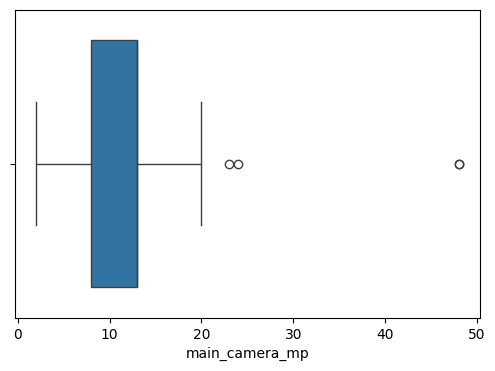

In [117]:
plt.figure(figsize=(6,4))
sns.boxplot(data=cdata.loc[cdata['brand_name'] == 'ZTE'], x='main_camera_mp');

In [118]:
# Check Nokia
cdata.loc[cdata['brand_name'] == 'Nokia']

brand_name       os  screen_size   4g  5g  main_camera_mp  \
110       Nokia  Android        16.56  yes  no             0.3   
111       Nokia  Android        13.84  yes  no             0.3   
112       Nokia  Android        13.84  yes  no             0.3   
113       Nokia   Others         5.18   no  no             0.3   
114       Nokia   Others         5.18   no  no             0.3   
...         ...      ...          ...  ...  ..             ...   
3384      Nokia  Android        15.29  yes  no            13.0   
3385      Nokia  Android        15.32  yes  no             5.0   
3386      Nokia  Android        15.32  yes  no             5.0   
3387      Nokia   Others         5.28  yes  no             2.0   
3388      Nokia  Android        14.50  yes  no            13.0   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
110                8.0       64.00  3.00   4000.0   200.0          2020   
111                5.0       16.00  2.00   3000.0   180.0          2020   
112                5.0       16.00  2.00   3000.0   180.0          2020   
113                0.0        0.10  0.03   1020.0    90.5          2020   
114                0.0        0.06  0.03   1020.0    91.3          2020   
...                ...         ...   ...      ...     ...           ...   
3384               5.0       32.00  2.00   4000.0   183.0          2019   
3385              20.0       64.00  4.00   3500.0   180.0          2019   
3386               8.0       32.00  3.00   3500.0   180.0          2019   
3387               0.0        0.10  0.03   1500.0   118.0          2019   
3388               5.0       16.00  2.00   3000.0   153.0          2019   

      days_used  normalized_used_price  normalized_new_price  
110         310               4.186012              5.004885  
111         193               3.616309              4.100161  
112         356               4.055430              4.591984  
113         272               2.910174              3.399863  
114         288               2.729159              2.911263  
...         ...                    ...                   ...  
3384        520               4.145671              4.438289  
3385        459               4.789407              5.127292  
3386        417               4.145354              4.950107  
3387        295               3.444576              4.085304  
3388        235               4.022311              4.085808  

[106 rows x 15 columns]

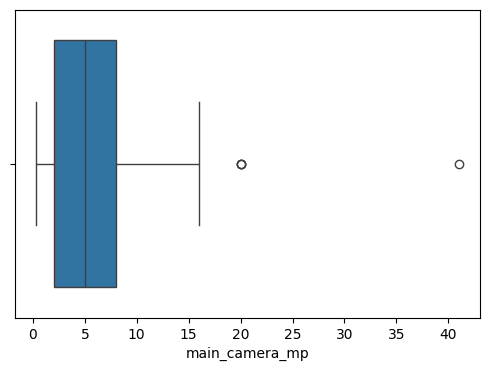

In [119]:
plt.figure(figsize=(6,4))
sns.boxplot(data=cdata.loc[cdata['brand_name'] == 'Nokia'], x='main_camera_mp');

In [120]:
cdata.loc[cdata['brand_name'] == 'Motorola']

brand_name       os  screen_size   4g   5g  main_camera_mp  \
108    Motorola  Android        15.37  yes   no            13.0   
109    Motorola  Android        15.42  yes  yes            13.0   
327    Motorola  Android        15.37  yes   no            13.0   
328    Motorola  Android        15.42  yes  yes            13.0   
1963   Motorola  Android        15.29  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3378   Motorola  Android        16.23  yes   no            13.0   
3379   Motorola  Android        15.32  yes   no            13.0   
3380   Motorola  Android        12.83  yes   no            13.0   
3381   Motorola  Android        15.34  yes   no            48.0   
3382   Motorola  Android        15.32  yes   no            13.0   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
108               16.0       128.0   6.0   5000.0   210.0          2020   
109               25.0       256.0  12.0   5000.0   203.0          2020   
327               16.0       128.0   6.0   5000.0   210.0          2020   
328               25.0       256.0  12.0   5000.0   203.0          2020   
1963              12.0        64.0   4.0   3000.0   176.0          2019   
...                ...         ...   ...      ...     ...           ...   
3378              25.0       128.0   4.0   4000.0   190.0          2019   
3379              12.0       128.0   4.0   3500.0   176.0          2019   
3380               5.0        16.0   2.0   3000.0   159.0          2019   
3381              25.0       128.0   4.0   3600.0   165.0          2019   
3382              25.0       128.0   4.0   3500.0   180.0          2019   

      days_used  normalized_used_price  normalized_new_price  
108         242               4.829673              5.704849  
109         220               5.186883              7.090785  
327          92               5.034156              5.697295  
328         188               5.639813              7.087983  
1963        390               4.711240              5.697664  
...         ...                    ...                   ...  
3378        348               4.835329              5.681025  
3379        481               4.789490              5.047546  
3380        371               3.037354              3.931630  
3381        422               5.331027              5.541224  
3382        200               4.774744              5.110481  

[106 rows x 15 columns]

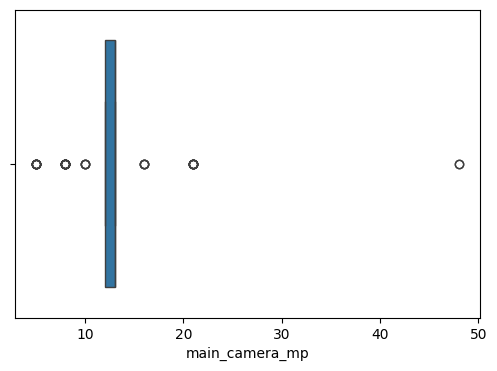

In [121]:
plt.figure(figsize=(6,4))
sns.boxplot(data=cdata.loc[cdata['brand_name'] == 'Motorola'], x='main_camera_mp');

- The outlier value of 48 megapixels main camera resolution for ZTE devices seems not reasonable. It is also the case for Nokia and Motorola main camera resolution outliers with values larger than 40 megapixels. Therefore, we impute these outliers by dropping these data.

In [122]:
# Impute outliers
cdata_new = cdata.drop([210,215,2097,3240,3381], axis=0)

In [123]:
# Check outliers in selfie camera resolution
cdata.loc[(cdata['selfie_camera_mp'] < lower_whisker['selfie_camera_mp'])  | (cdata['selfie_camera_mp'] > upper_whisker['selfie_camera_mp'])]

brand_name       os  screen_size   4g   5g  main_camera_mp  \
16        Honor  Android        15.90  yes   no            13.0   
41       Huawei  Android        15.90  yes   no            13.0   
47       Huawei  Android        15.90  yes   no            13.0   
52       Huawei  Android        16.23  yes   no            13.0   
53       Huawei  Android        16.23  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3431    Samsung  Android        15.42  yes   no            12.0   
3432    Samsung  Android        15.37  yes   no            12.0   
3437    Samsung  Android        15.42  yes  yes            12.0   
3439    Samsung  Android        15.34  yes   no            12.0   
3448       Asus  Android        16.74  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
16                32.0       128.0  6.0   3750.0   172.0          2019   
41                32.0        64.0  6.0   4000.0   178.0          2019   
47                32.0       128.0  6.0   4000.0   178.0          2019   
52                32.0       128.0  8.0   3500.0   171.0          2019   
53                32.0       128.0  8.0   3500.0   171.0          2019   
...                ...         ...  ...      ...     ...           ...   
3431              32.0       128.0  6.0   4500.0   179.0          2019   
3432              32.0        64.0  4.0   4000.0   172.0          2019   
3437              32.0       128.0  6.0   4500.0   206.0          2019   
3439              32.0        64.0  4.0   4000.0   169.0          2019   
3448              24.0       128.0  8.0   6000.0   240.0          2019   

      days_used  normalized_used_price  normalized_new_price  
16          395               5.022366              5.517935  
41          206               4.996536              5.294560  
47          244               5.143475              5.670295  
52          333               5.428205              5.965249  
53          284               5.378560              5.885521  
...         ...                    ...                   ...  
3431        202               5.302011              5.633539  
3432        382               5.069219              5.405781  
3437        254               5.572306              6.742373  
3439        315               5.137092              5.443240  
3448        325               5.715316              7.059317  

[221 rows x 15 columns]

In [124]:
# Check outliers in interanl memory
cdata.loc[(cdata['int_memory'] < lower_whisker['int_memory'])  | (cdata['int_memory'] > upper_whisker['int_memory'])]

brand_name       os  screen_size   4g   5g  main_camera_mp  \
34       Huawei  Android        16.71  yes  yes            10.5   
44       Huawei  Android        16.59  yes  yes            13.0   
84           LG  Android        15.34  yes  yes             8.0   
109    Motorola  Android        15.42  yes  yes            13.0   
120     OnePlus  Android        16.94  yes  yes            13.0   
...         ...      ...          ...  ...  ...             ...   
3393       Oppo  Android        15.42  yes  yes            13.0   
3426    Samsung  Android        15.42  yes   no             8.0   
3436    Samsung  Android        17.86  yes  yes            12.0   
3440    Samsung  Android        15.44  yes   no            12.0   
3441    Samsung  Android        15.32  yes   no            12.0   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
34                16.0       256.0   8.0   4200.0   226.0          2020   
44                16.0       512.0  12.0   4500.0   198.0          2019   
84                32.0       256.0   8.0   4000.0   192.0          2019   
109               25.0       256.0  12.0   5000.0   203.0          2020   
120               16.0       256.0  12.0   4085.0   206.0          2019   
...                ...         ...   ...      ...     ...           ...   
3393              32.0       256.0  12.0   4260.0   217.0          2020   
3426              10.0       256.0   8.0   3300.0   183.0          2020   
3436               9.0       512.0  12.0   4235.0   263.0          2019   
3440              10.0       256.0  12.0   4300.0   196.0          2019   
3441              10.0       256.0   8.0   3500.0   168.0          2019   

      days_used  normalized_used_price  normalized_new_price  
34          120               6.153456              7.244220  
44          289               5.674182              7.438007  
84          383               5.467680              7.003175  
109         220               5.186883              7.090785  
120         458               5.713403              6.686161  
...         ...                    ...                   ...  
3393        159               5.505982              6.840536  
3426        355               5.471094              6.822197  
3436        434               5.573750              7.333016  
3440        489               5.200153              6.509499  
3441        429               5.205050              6.250940  

[138 rows x 15 columns]

In [125]:
cdata.loc[(cdata['int_memory'] < lower_whisker['int_memory'])  | (cdata['int_memory'] > upper_whisker['int_memory'])]['brand_name'].value_counts()

brand_name
Celkon        22
Huawei        18
Samsung       12
Others        11
Xiaomi        11
Oppo           9
OnePlus        6
Micromax       5
Vivo           5
Lava           5
Alcatel        4
Karbonn        4
Honor          4
Lenovo         3
Asus           3
LG             3
ZTE            3
Apple          2
Motorola       2
Spice          2
Gionee         1
BlackBerry     1
Meizu          1
Sony           1
Name: count, dtype: int64

In [126]:
# Check outliers in ram
cdata.loc[(cdata['battery'] < lower_whisker['battery'])  | (cdata['battery'] > upper_whisker['battery'])]

brand_name       os  screen_size   4g   5g  main_camera_mp  \
3         Honor  Android        25.50  yes  yes           13.00   
33       Huawei  Android        25.50  yes   no            8.00   
36       Huawei  Android        25.60  yes  yes           13.00   
40       Huawei  Android        25.60  yes   no           13.00   
49       Huawei  Android        25.60  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
2588    Samsung  Android        25.43   no   no            8.00   
2608    Samsung  Android        25.43  yes   no            8.00   
2781      Spice  Android        25.40   no   no            3.15   
2937     Xiaomi  Android        25.43  yes   no           13.00   
3051     Others  Android        12.83  yes   no           16.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3                  8.0        64.0  6.0   7250.0   480.0          2020   
33                 8.0        64.0  4.0   7250.0   450.0          2020   
36                 8.0       128.0  6.0   7250.0   460.0          2020   
40                 8.0       128.0  6.0   7250.0   460.0          2019   
49                 8.0        64.0  4.0   7500.0   498.0          2019   
...                ...         ...  ...      ...     ...           ...   
2588               2.0        16.0  4.0   8220.0   469.0          2014   
2608               2.0        16.0  4.0   8220.0   130.4          2013   
2781               0.3        16.0  4.0   7600.0   158.0          2013   
2937               5.0       128.0  4.0   8620.0   485.0          2018   
3051               8.0        32.0  4.0   9000.0   469.0          2018   

      days_used  normalized_used_price  normalized_new_price  
3           345               5.135387              5.630961  
33          211               5.133089              5.518777  
36          139               5.182457              6.310336  
40          256               4.997685              6.107268  
49          205               4.936630              5.704782  
...         ...                    ...                   ...  
2588        920               4.741011              5.888545  
2608        971               4.773815              5.915582  
2781        917               4.391729              5.189283  
2937        665               5.116256              5.563063  
3051        621               4.938566              5.519900  

[77 rows x 15 columns]

In [127]:
cdata.loc[(cdata['battery'] < lower_whisker['battery'])  | (cdata['battery'] > upper_whisker['battery'])]['brand_name'].value_counts()

brand_name
Samsung    20
Lenovo     14
Huawei     11
Apple      10
Others      8
LG          5
Honor       2
Asus        2
Acer        1
Gionee      1
Google      1
Spice       1
Xiaomi      1
Name: count, dtype: int64

- It seems the outliers for selfie camera resolution, internal memory, battery all don't have patterns and they vary a lot with the brands. Therefore, we do not plan to impute the outliers except for the main camera resolution.

## EDA

- It is a good idea to explore the data once again after manipulating it.

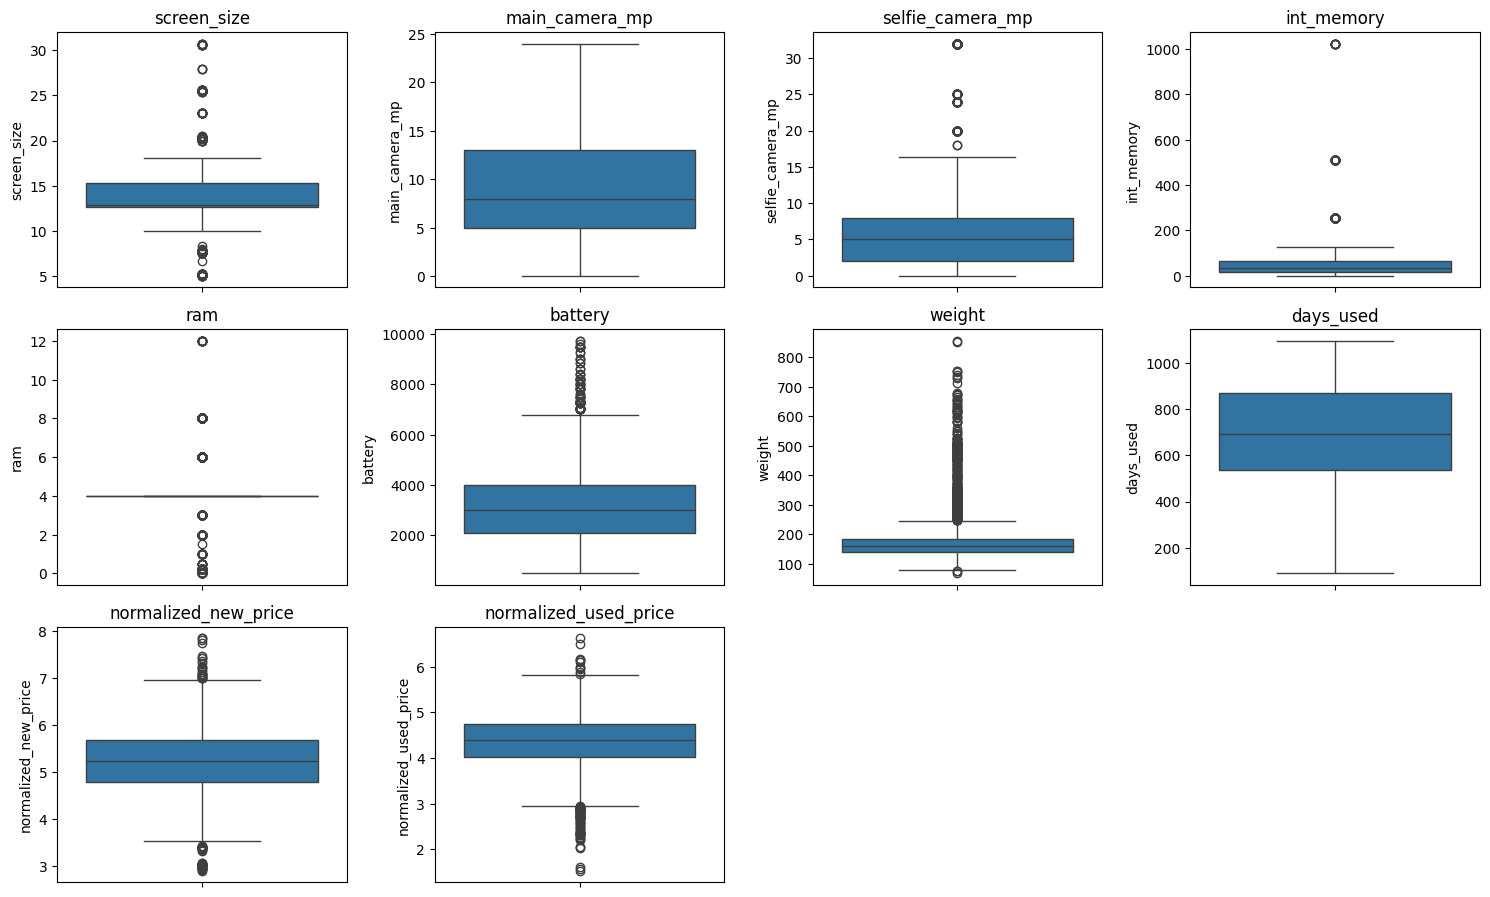

In [128]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
                   'days_used', 'normalized_new_price', 'normalized_used_price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(cdata_new[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- The outliers in main camera resolution have been imputed.

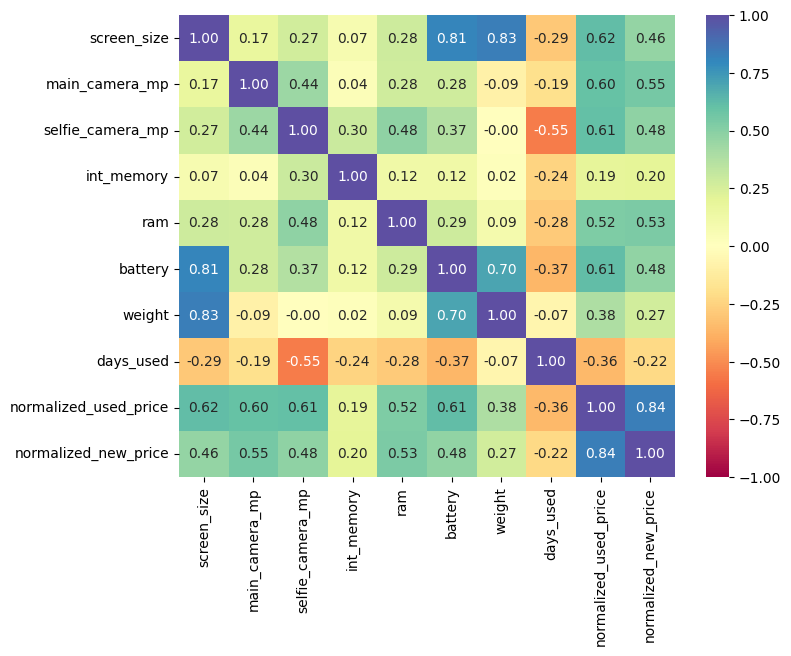

In [129]:
cdata_copy_new = cdata_new.drop(['brand_name','os','4g','5g','release_year'], axis=1)
cdata_copy_new.head()

plt.figure(figsize=(8,6))
sns.heatmap(cdata_copy_new.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral');

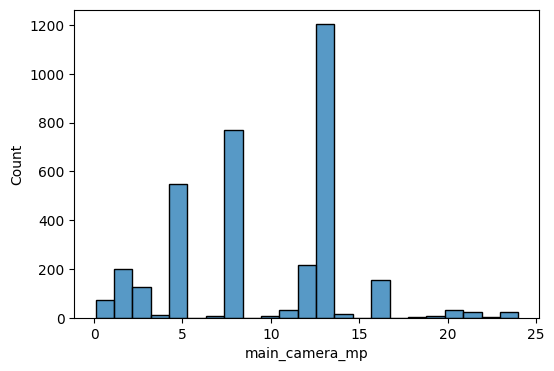

In [130]:
plt.figure(figsize=(6,4))
sns.histplot(data=cdata_new, x='main_camera_mp');

- The large values in main camera resolution have been removed.

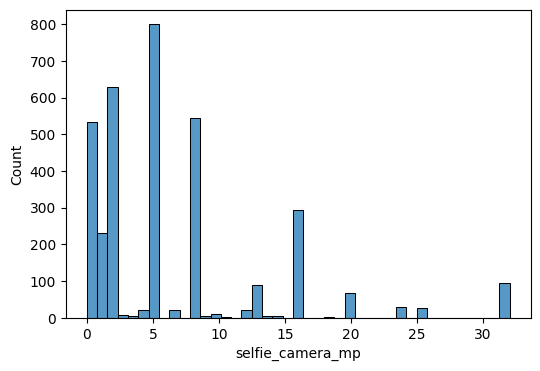

In [131]:
plt.figure(figsize=(6,4))
sns.histplot(data=cdata_new, x='selfie_camera_mp');

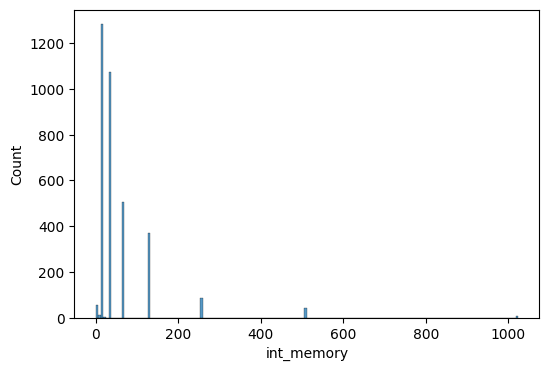

In [132]:
plt.figure(figsize=(6,4))
sns.histplot(data=cdata_new, x='int_memory');

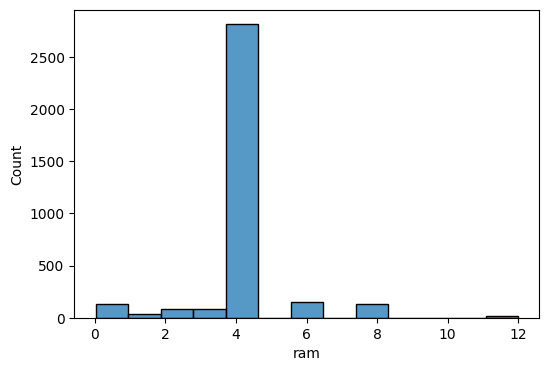

In [133]:
plt.figure(figsize=(6,4))
sns.histplot(data=cdata_new, x='ram');

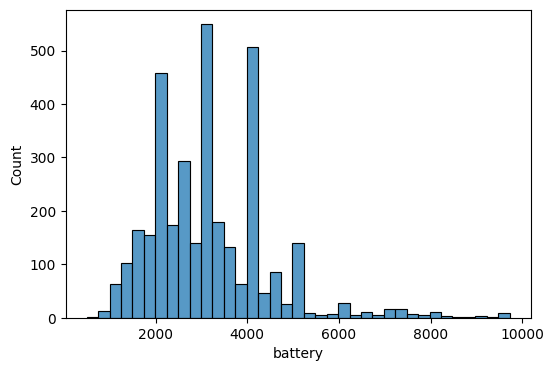

In [134]:
plt.figure(figsize=(6,4))
sns.histplot(data=cdata_new, x='battery');

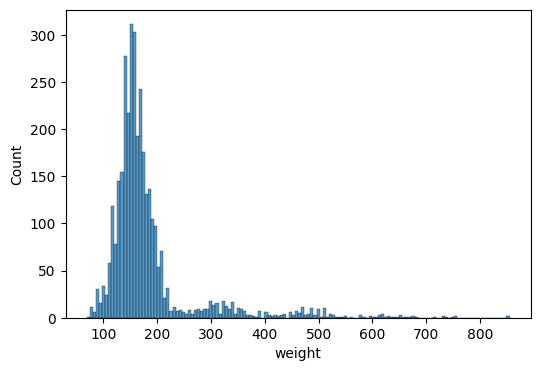

In [135]:
plt.figure(figsize=(6,4))
sns.histplot(data=cdata_new, x='weight');

<Figure size 600x400 with 0 Axes>

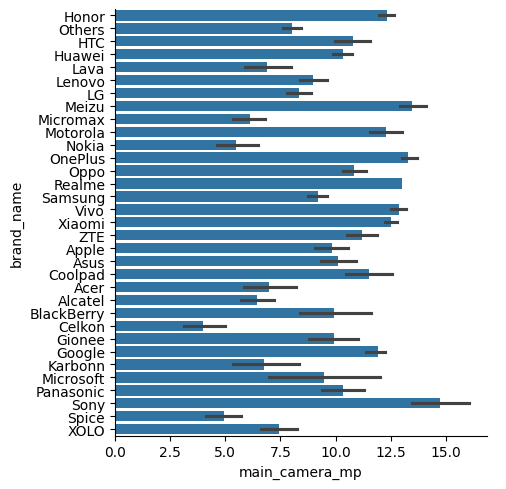

<Figure size 600x400 with 0 Axes>

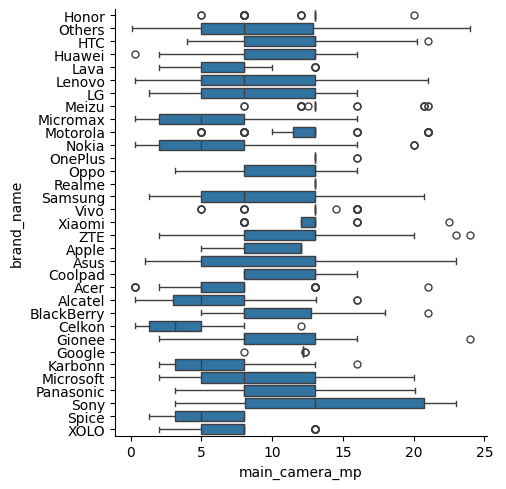

In [136]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='main_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='main_camera_mp', kind='box');

<Figure size 600x400 with 0 Axes>

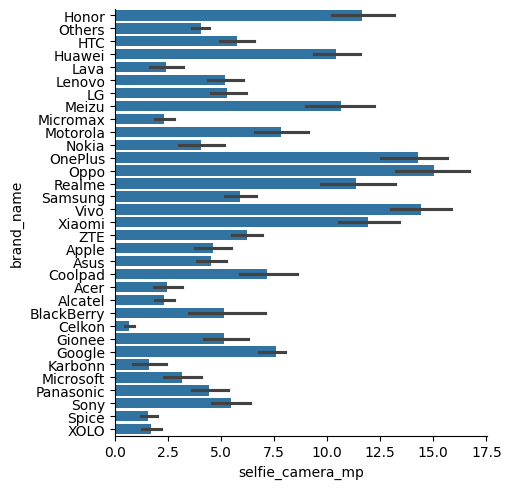

<Figure size 600x400 with 0 Axes>

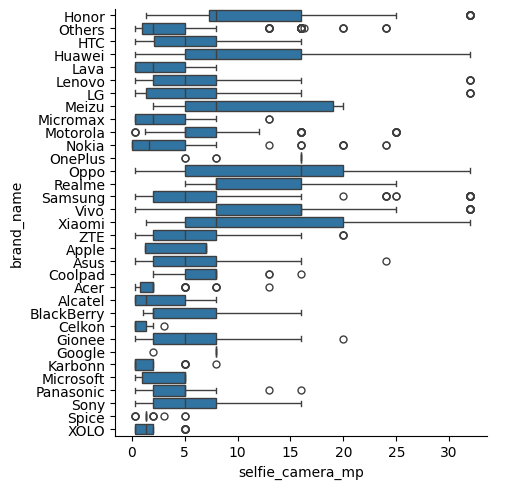

In [137]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='selfie_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='selfie_camera_mp', kind='box');

<Figure size 600x400 with 0 Axes>

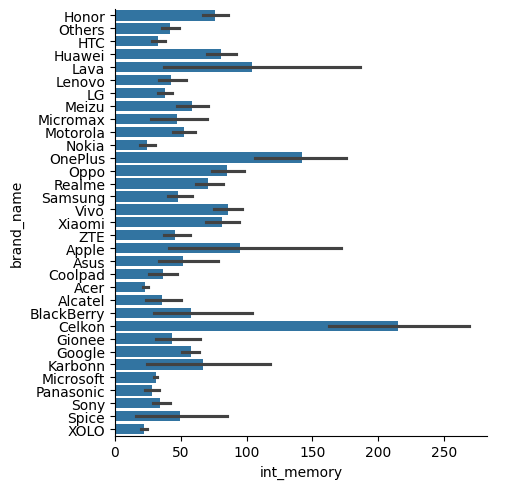

<Figure size 600x400 with 0 Axes>

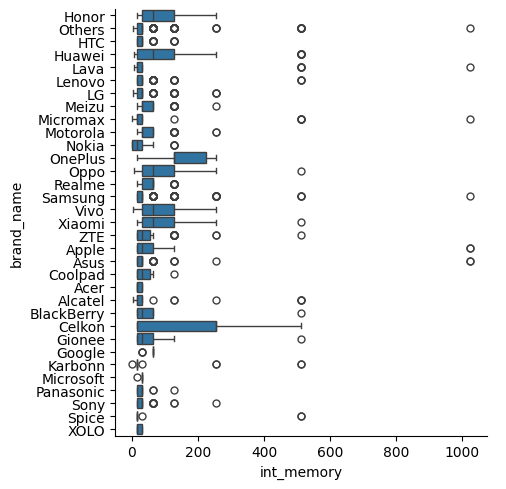

In [138]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='int_memory', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='int_memory', kind='box');

<Figure size 600x400 with 0 Axes>

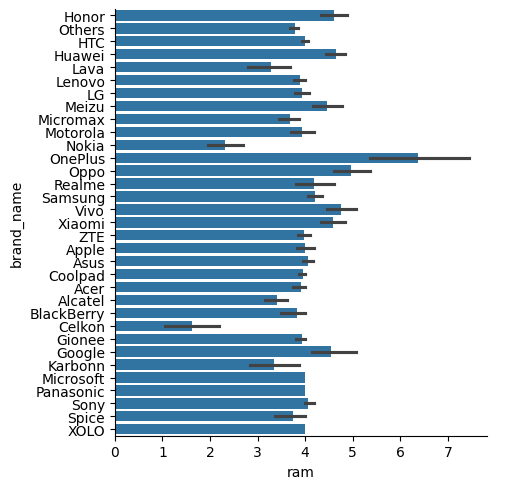

<Figure size 600x400 with 0 Axes>

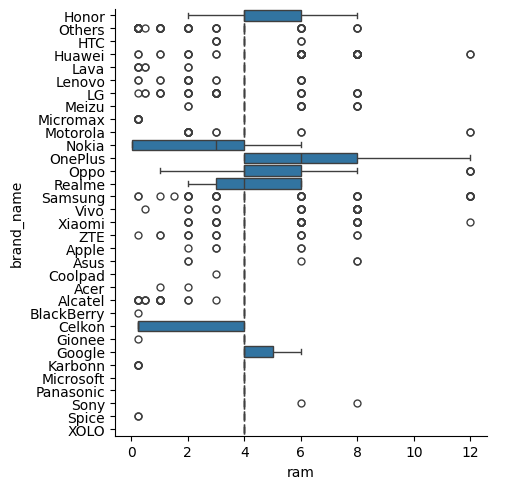

In [139]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='ram', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='ram', kind='box');

<Figure size 600x400 with 0 Axes>

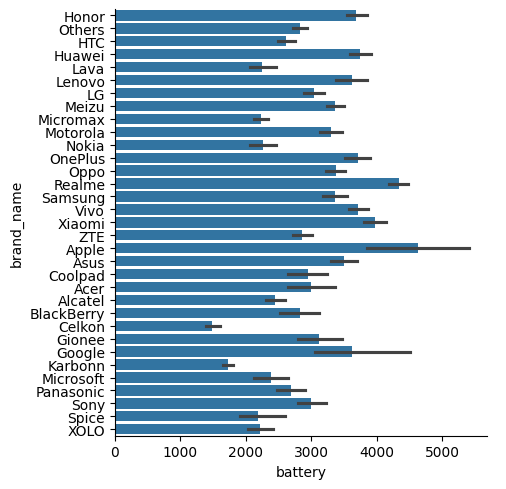

<Figure size 600x400 with 0 Axes>

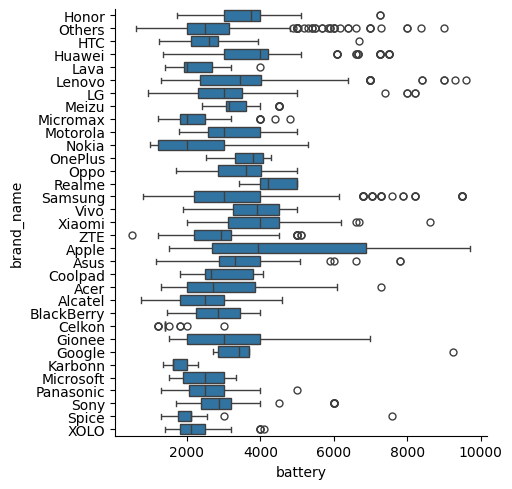

In [140]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='battery', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='battery', kind='box');

<Figure size 600x400 with 0 Axes>

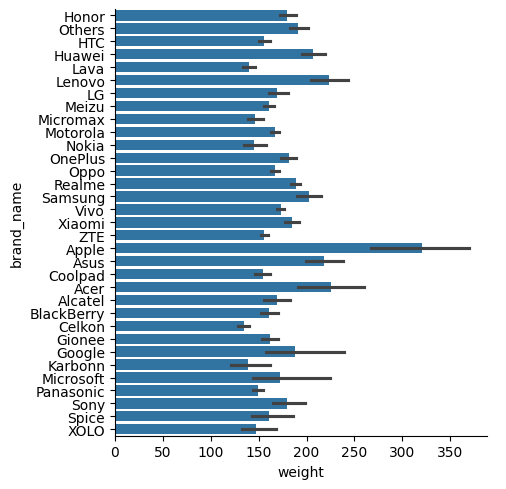

<Figure size 600x400 with 0 Axes>

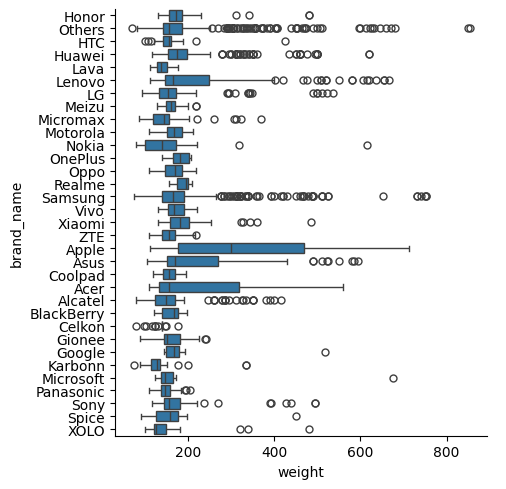

In [141]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='weight', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='brand_name', x='weight', kind='box');

<Figure size 600x400 with 0 Axes>

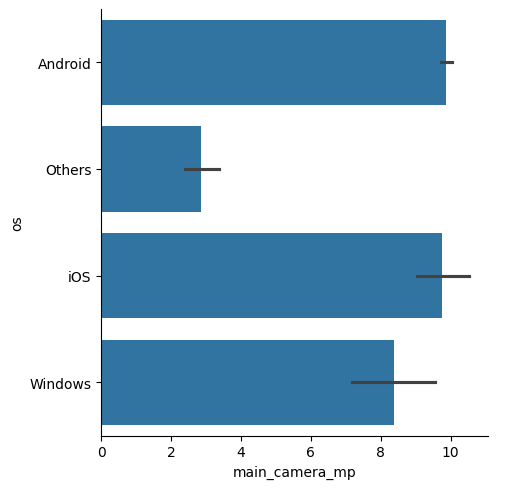

<Figure size 600x400 with 0 Axes>

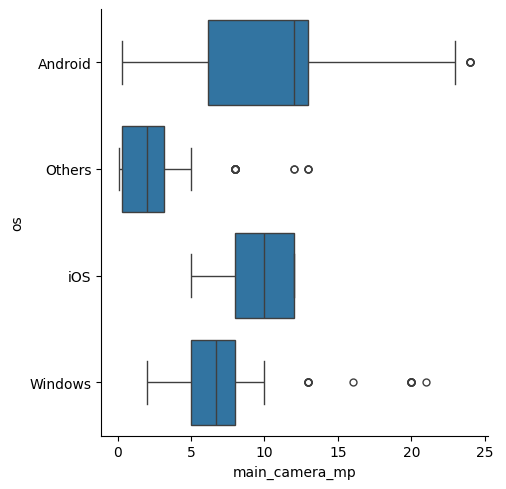

In [142]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='os', x='main_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, y='os', x='main_camera_mp', kind='box');

<Figure size 600x400 with 0 Axes>

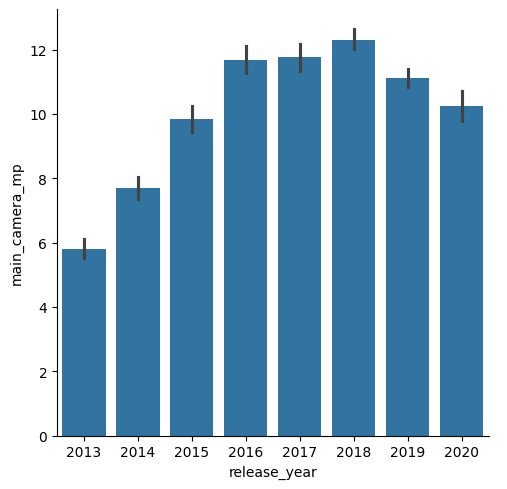

<Figure size 600x400 with 0 Axes>

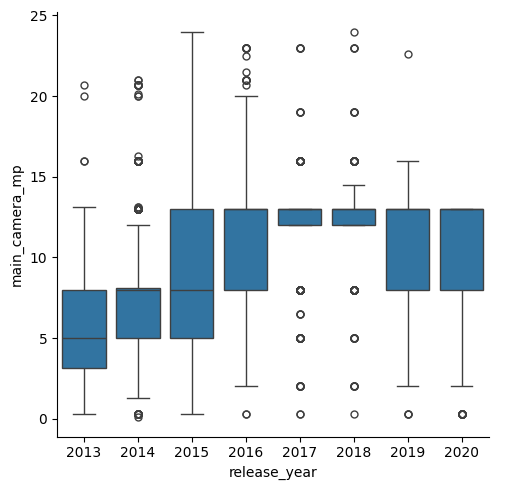

In [143]:
plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, x='release_year', y='main_camera_mp', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(data=cdata_new, x='release_year', y='main_camera_mp', kind='box');

- In genral, the features from the exploratory data analysis do not change much after the data imputation.

## Model Building - Linear Regression

In [144]:
# Check the imputed dataset
cdata_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3439 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3439 non-null   object 
 1   os                     3439 non-null   object 
 2   screen_size            3439 non-null   float64
 3   4g                     3439 non-null   object 
 4   5g                     3439 non-null   object 
 5   main_camera_mp         3439 non-null   float64
 6   selfie_camera_mp       3439 non-null   float64
 7   int_memory             3439 non-null   float64
 8   ram                    3439 non-null   float64
 9   battery                3439 non-null   float64
 10  weight                 3439 non-null   float64
 11  release_year           3439 non-null   int64  
 12  days_used              3439 non-null   int64  
 13  normalized_used_price  3439 non-null   float64
 14  normalized_new_price   3439 non-null   float64
dtypes: float6

In [145]:
cdata_new = pd.get_dummies(cdata_new, columns=cdata_new.select_dtypes(include=['object','category']).columns.tolist(), drop_first=True, dtype=int)
cdata_new.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  release_year  days_used  normalized_used_price  ...  \
0   146.0          2020        127               4.307572  ...   
1   213.0          2020        325               5.162097  ...   
2   213.0          2020        162               5.111084  ...   
3   480.0          2020        345               5.135387  ...   
4   185.0          2020        293               4.389995  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0                 0                0                0                  0   
1                 0                0                0                  0   
2                 0                0                0                  0   
3                 0                0                0                  0   
4                 0                0                0                  0   

   brand_name_ZTE  os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0               0          0           0       0       1       0  
1               0          0           0       0       1       1  
2               0          0           0       0       1       1  
3               0          0           0       0       1       1  
4               0          0           0       0       1       0  

[5 rows x 48 columns]

### Split data

In [146]:
# Independent variable
X = cdata_new.drop(['normalized_used_price'], axis=1)

# Dependent variable
y = cdata_new['normalized_used_price']

In [147]:
# Add a constant
X = sm.add_constant(X)

- We will now split X and y into train and test sets in a 70:30 ratio. We will use the train_test_split() function of sklearn to do the same.

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [149]:
X_train.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
1397    1.0        10.34             8.0               5.0        32.0  4.0   
3174    1.0        12.70             8.0               1.0        16.0  4.0   
695     1.0        12.70             8.0               2.0        32.0  4.0   
1082    1.0        12.70            12.2               8.0        64.0  4.0   
2329    1.0        12.83            16.0               8.0        16.0  4.0   

      battery  weight  release_year  days_used  ...  brand_name_Spice  \
1397   2000.0   120.0          2013        625  ...                 0   
3174   2300.0   130.0          2013        916  ...                 0   
695    2000.0   160.0          2014        985  ...                 0   
1082   2700.0   143.0          2017        890  ...                 0   
2329   2500.0   150.0          2014        706  ...                 0   

      brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
1397                0                0                  0               0   
3174                0                0                  0               1   
695                 0                0                  0               0   
1082                0                0                  0               0   
2329                0                0                  0               0   

      os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
1397          0           0       0       0       0  
3174          0           0       0       1       0  
695           0           0       0       1       0  
1082          0           0       0       1       0  
2329          0           0       0       0       0  

[5 rows x 48 columns]

In [150]:
X_test.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
2585    1.0        30.53             8.0               2.0        32.0  4.0   
1973    1.0        12.88            13.0               5.0        16.0  4.0   
3375    1.0        15.32            13.0              25.0        64.0  4.0   
166     1.0        16.21            13.0              32.0       128.0  8.0   
507     1.0        12.83             5.0               2.0        32.0  4.0   

      battery  weight  release_year  days_used  ...  brand_name_Spice  \
2585   9500.0  732.00          2014        799  ...                 0   
1973   4000.0  174.00          2018        426  ...                 0   
3375   4000.0  188.00          2019        216  ...                 0   
166    4500.0  186.70          2019        264  ...                 0   
507    2800.0  142.95          2015        658  ...                 0   

      brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
2585                0                0                  0               0   
1973                0                0                  0               0   
3375                0                0                  0               0   
166                 1                0                  0               0   
507                 0                0                  0               0   

      os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
2585          0           0       0       0       0  
1973          0           0       0       1       0  
3375          0           0       0       1       0  
166           0           0       0       1       0  
507           0           0       0       1       0  

[5 rows x 48 columns]

- Fit the model

In [151]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [152]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     270.0
Date:                   Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                           03:39:22   Log-Likelihood:                 87.832
No. Observations:                   2407   AIC:                            -79.66
Df Residuals:                       2359   BIC:                             198.1
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [153]:
# Form the dataset
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()
df_pred["Fitted Values"] = olsres.fittedvalues.values
df_pred["Residuals"] = olsres.resid.values

In [154]:
# Get the predict values using test data
y_pred = olsres.predict(X_test)

In [155]:
# Check the rmse on training data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred['Fitted Values']))
rmse1

0.23330029511153957

In [156]:
# Check the rmse on test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.22961987724780691

In [157]:
# Check the MAE on training data
mae1 = mean_absolute_error(y_train, df_pred['Fitted Values'])
mae1

0.18068765652396077

In [158]:
# Check the MAE on test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.18112250515207237

- The RMSE and MAE of the fitting model is very comparable between the training data and test data. We did not overfit it. But we still need to check the assumptions for the linear regression model.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### First check the multicollinearity assumption

In [159]:
# Calculate the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [160]:
checking_vif(X_train)

feature           VIF
0                   const  3.790465e+06
1             screen_size  7.444635e+00
2          main_camera_mp  2.445557e+00
3        selfie_camera_mp  2.938400e+00
4              int_memory  1.311032e+00
5                     ram  2.332062e+00
6                 battery  4.112115e+00
7                  weight  5.985006e+00
8            release_year  4.933890e+00
9               days_used  2.595001e+00
10   normalized_new_price  3.117655e+00
11     brand_name_Alcatel  3.021296e+00
12       brand_name_Apple  1.291910e+01
13        brand_name_Asus  3.138809e+00
14  brand_name_BlackBerry  1.551631e+00
15      brand_name_Celkon  1.570889e+00
16     brand_name_Coolpad  1.459556e+00
17      brand_name_Gionee  1.891757e+00
18      brand_name_Google  1.333202e+00
19         brand_name_HTC  2.976127e+00
20       brand_name_Honor  3.137209e+00
21      brand_name_Huawei  5.442512e+00
22     brand_name_Karbonn  1.560763e+00
23          brand_name_LG  4.416728e+00
24        brand_name_Lava  1.659030e+00
25      brand_name_Lenovo  3.916402e+00
26       brand_name_Meizu  2.108428e+00
27    brand_name_Micromax  3.042764e+00
28   brand_name_Microsoft  1.805764e+00
29    brand_name_Motorola  2.908791e+00
30       brand_name_Nokia  3.288003e+00
31     brand_name_OnePlus  1.532543e+00
32        brand_name_Oppo  3.488173e+00
33      brand_name_Others  8.493180e+00
34   brand_name_Panasonic  2.092441e+00
35      brand_name_Realme  1.779057e+00
36     brand_name_Samsung  6.718239e+00
37        brand_name_Sony  2.576765e+00
38       brand_name_Spice  1.531484e+00
39        brand_name_Vivo  3.256896e+00
40        brand_name_XOLO  1.924043e+00
41      brand_name_Xiaomi  3.538207e+00
42         brand_name_ZTE  3.299178e+00
43              os_Others  1.808162e+00
44             os_Windows  1.656266e+00
45                 os_iOS  1.182058e+01
46                 4g_yes  2.524941e+00
47                 5g_yes  1.850891e+00

- Screen size and weight have high VIF values greater than 5. We therefore need to remove the multicollinearity by dropping these two columns one by one and check the adjusted R-squared and RMSE.

In [161]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [162]:
# list of high VIF columns
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  screen_size                           0.837006                 0.237951
1       weight                           0.835663                 0.238929

- Dropping the screen size decreases the adjusted R-squared value less than dropping the weight. Therefore, we first drop screen size and check VIF again.

In [163]:
col_to_drop = "screen_size"
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


feature           VIF
0                   const  3.690367e+06
1          main_camera_mp  2.443045e+00
2        selfie_camera_mp  2.930754e+00
3              int_memory  1.307038e+00
4                     ram  2.331959e+00
5                 battery  3.813244e+00
6                  weight  2.894688e+00
7            release_year  4.799837e+00
8               days_used  2.580423e+00
9    normalized_new_price  3.079143e+00
10     brand_name_Alcatel  3.020833e+00
11       brand_name_Apple  1.286502e+01
12        brand_name_Asus  3.134354e+00
13  brand_name_BlackBerry  1.548994e+00
14      brand_name_Celkon  1.569518e+00
15     brand_name_Coolpad  1.458650e+00
16      brand_name_Gionee  1.883341e+00
17      brand_name_Google  1.329687e+00
18         brand_name_HTC  2.968911e+00
19       brand_name_Honor  3.137193e+00
20      brand_name_Huawei  5.438988e+00
21     brand_name_Karbonn  1.560760e+00
22          brand_name_LG  4.401937e+00
23        brand_name_Lava  1.659017e+00
24      brand_name_Lenovo  3.912870e+00
25       brand_name_Meizu  2.106332e+00
26    brand_name_Micromax  3.040103e+00
27   brand_name_Microsoft  1.804230e+00
28    brand_name_Motorola  2.899056e+00
29       brand_name_Nokia  3.272982e+00
30     brand_name_OnePlus  1.532542e+00
31        brand_name_Oppo  3.482390e+00
32      brand_name_Others  8.447592e+00
33   brand_name_Panasonic  2.090990e+00
34      brand_name_Realme  1.776778e+00
35     brand_name_Samsung  6.704113e+00
36        brand_name_Sony  2.573198e+00
37       brand_name_Spice  1.527204e+00
38        brand_name_Vivo  3.256691e+00
39        brand_name_XOLO  1.923922e+00
40      brand_name_Xiaomi  3.531470e+00
41         brand_name_ZTE  3.295130e+00
42              os_Others  1.599557e+00
43             os_Windows  1.656096e+00
44                 os_iOS  1.171647e+01
45                 4g_yes  2.521820e+00
46                 5g_yes  1.847347e+00

- The multicollinearity assumption has been met now.
- We can treat the high p-value variables now.

In [164]:
olsmod1 = sm.OLS(y_train, X_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     269.6
Date:                   Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                           03:39:25   Log-Likelihood:                 64.051
No. Observations:                   2407   AIC:                            -34.10
Df Residuals:                       2360   BIC:                             237.8
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- There are two independent variables having p-value larger than 0.05, which are battery and days_used. We drop and check these variables one by one.

In [165]:
# Drop days_ised first due to its higher p_value
X_train2 = X_train1.drop(['days_used'], axis=1)
olsmod2 = sm.OLS(y_train, X_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     275.7
Date:                   Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                           03:39:25   Log-Likelihood:                 64.046
No. Observations:                   2407   AIC:                            -36.09
Df Residuals:                       2361   BIC:                             230.1
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- Since dropping days_used does not change adjusted R-squared value, we decide to drop this variable.

In [166]:
# Drop battery
X_train3 = X_train2.drop(['battery'], axis=1)
olsmod3 = sm.OLS(y_train, X_train3)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     282.0
Date:                   Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                           03:39:25   Log-Likelihood:                 63.823
No. Observations:                   2407   AIC:                            -37.65
Df Residuals:                       2362   BIC:                             222.7
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- Since dropping battery does not change adjusted R-squared value, we decide to drop this variable.
- Now the p_values for independent variables are all smaller than 0.05, except for the categorical columns.

### Test for assumptions of linearity and independence

In [167]:
# Form the dataset
df_pred1 = pd.DataFrame()

df_pred1["Actual Values"] = y_train.values.flatten()
df_pred1["Fitted Values"] = olsres3.fittedvalues.values
df_pred1["Residuals"] = olsres3.resid.values

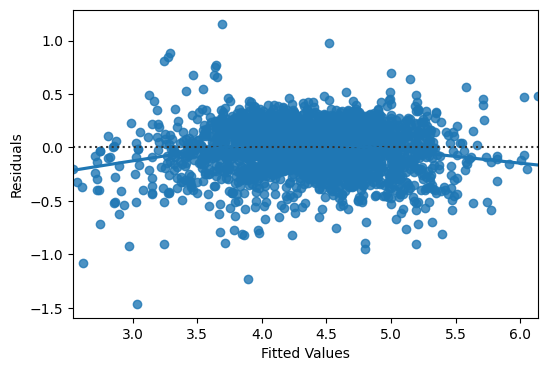

In [168]:
# Check the residue scatter plot
plt.figure(figsize=(6,4))
sns.residplot(data=df_pred1, x='Fitted Values', y='Residuals', lowess=True);

- No pattern is observed. The dataset follows the linearity and indepence assumpitions.

### Test for Normality

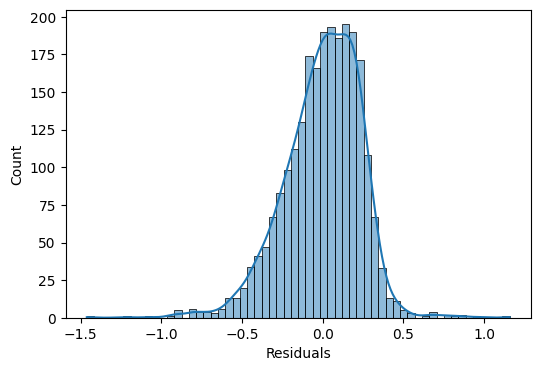

In [169]:
# Check the distribution of residuals
plt.figure(figsize=(6,4))
sns.histplot(df_pred1['Residuals'], kde=True);

- The distribution of the residuals looks very similar to a normal distribution.

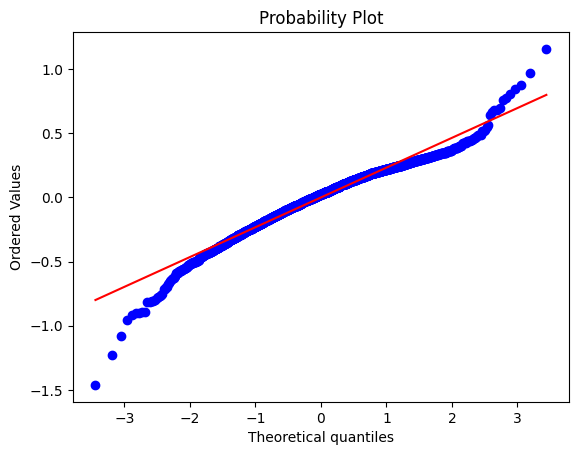

In [170]:
# Check the Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred1["Residuals"], dist="norm", plot=pylab)
plt.show();

- Most of the data follow the straightline in the Q-Q plot.

In [171]:
# Shapiro test
stats.shapiro(df_pred1["Residuals"])

ShapiroResult(statistic=0.9693410396575928, pvalue=2.894575523680873e-22)

- Since the p-value is smaller than 0.05, we have enough evidence to reject the null hypothesis. The dataset does not follow a normal distribution.
- However, given the evidence from the distribution of residuals and Q-Q plot, we can overall believe the dataset follows a normal distribution.

### Test for the assumption of homoscedasticity

In [172]:
# Test homoscedasticity using goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistics', 'p-value']
test = sms.het_goldfeldquandt(df_pred1['Residuals'], X_train3)
lzip(name, test)

[('F statistics', 1.061472466202687), ('p-value', 0.1550074136001015)]

- Since the p-value is larger than 0.05, we do not have enough evidence to reject the null hypothesis. Therefore, the dataset follows the homoscedasticity assumpition.

## Final Model

- All the assumptions are satisfied. Let's check the final model.

In [173]:
print(olsres3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     282.0
Date:                   Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                           03:39:27   Log-Likelihood:                 63.823
No. Observations:                   2407   AIC:                            -37.65
Df Residuals:                       2362   BIC:                             222.7
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- Let's check the parameters

In [174]:
olsres3.params

const                   -54.529243
main_camera_mp            0.025548
selfie_camera_mp          0.014087
int_memory                0.000145
ram                       0.024774
weight                    0.001714
release_year              0.027734
normalized_new_price      0.428292
brand_name_Alcatel        0.011324
brand_name_Apple         -0.012004
brand_name_Asus           0.003325
brand_name_BlackBerry    -0.039776
brand_name_Celkon        -0.253393
brand_name_Coolpad        0.022666
brand_name_Gionee        -0.058776
brand_name_Google        -0.071718
brand_name_HTC           -0.023143
brand_name_Honor          0.009999
brand_name_Huawei        -0.046628
brand_name_Karbonn       -0.105426
brand_name_LG            -0.056671
brand_name_Lava           0.014923
brand_name_Lenovo        -0.003553
brand_name_Meizu         -0.047794
brand_name_Micromax      -0.042970
brand_name_Microsoft      0.023508
brand_name_Motorola      -0.062646
brand_name_Nokia          0.009643
brand_name_OnePlus  

- Let's check the final equation

In [175]:
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(X_train3.columns)):
    if i == 0:
        print(olsres3.params[i], "+", end=" ")
    elif i != len(X_train3.columns) - 1:
        print(
            olsres3.params[i],
            "* (",
            X_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres3.params[i], "* (", X_train3.columns[i], ")")

normalized_used_price = -54.52924315619715 + 0.02554791606909572 * ( main_camera_mp ) +  0.014087289009407592 * ( selfie_camera_mp ) +  0.00014484234328537526 * ( int_memory ) +  0.024773883782301553 * ( ram ) +  0.0017139690575516096 * ( weight ) +  0.02773416352544002 * ( release_year ) +  0.42829202646862574 * ( normalized_new_price ) +  0.011324290084176122 * ( brand_name_Alcatel ) +  -0.012003732366883355 * ( brand_name_Apple ) +  0.0033248034368657713 * ( brand_name_Asus ) +  -0.03977648121754188 * ( brand_name_BlackBerry ) +  -0.25339277948252886 * ( brand_name_Celkon ) +  0.022665929646712418 * ( brand_name_Coolpad ) +  -0.05877626395574791 * ( brand_name_Gionee ) +  -0.07171769921829887 * ( brand_name_Google ) +  -0.02314265540353401 * ( brand_name_HTC ) +  0.009999211708048135 * ( brand_name_Honor ) +  -0.04662791482281974 * ( brand_name_Huawei ) +  -0.10542633554331493 * ( brand_name_Karbonn ) +  -0.05667091681843693 * ( brand_name_LG ) +  0.01492277180945887 * ( brand_name_

- Check the final model performance.

In [176]:
X_test3 = X_test1.drop(['battery','days_used'], axis=1)
y_pred3 = olsres3.predict(X_test3)

In [177]:
# Check rmse for training data
rmse1_f = np.sqrt(mean_squared_error(y_train, df_pred1['Fitted Values']))
rmse1_f

0.23563900737680288

In [178]:
# Check rmse for test data
rmse2_f = np.sqrt(mean_squared_error(y_test, y_pred3))
rmse2_f

0.23439603571934103

In [179]:
# Check mae for training data
mae1_f = mean_absolute_error(y_train, df_pred1['Fitted Values'])
mae1_f

0.18228167144890764

In [180]:
# Check mae for test data
mae2_f = mean_absolute_error(y_test, y_pred3)
mae2_f

0.18402070132066492

- The RMSE values and MAE values between training data and test data are comparable. We did not overfit the model.

## Actionable Insights and Recommendations

- Among all the used devices, Samsung has the most data count. Android os dominates more than 93% of the devices in the dataset.
- More than 75% of the used devices have screen size smaller than 16 cm. Huawei has the most (149) devices with a screen size larger than 6 inches (15.24 cm). Samsung ranks the second with 119 devices.
- The number of devices that support 4g network is approximately two times the number of devices that do not support 4g network. Less than 300 devices support 5g network in the datasets.
- The majority of the used devices have 4 GB RAM.
- The device weight tends to increase with battery size for devices offering large battery capacity (more than 4500 mAh).
- Huawei, Vivo, Oppo, Xiaomi, and Samsung rank the top five in terms of the data counts with device selfie camera resolution greater than 8 MP.
- The normalized new price and normalized used price
of devices generally follow the normal distribution in the dataset. Apple, OnePlus, and Google devices rank the top three for normalized new and used price. Celkon costs the least for new and used devices. Used device price tends to increase with the release time from 2013 to 2020, while the new device price tends to increase with the release time from 2013 to 2018 but is stablized after 2018.
- In terms of the correlations between device features, positive correlations are found between screen size and battery size, screen size and weight, and normalized used price and normalized new price. The normalized used price is found to have a relatively strong positive correlation with screen size, main and selfie camera resolution, RAM amount, and battery size. In addition, price of new and used devices is higher for devices supporting 4g or 5g than devices without the support.
- We have built a linear regression model to predict the used device price based on the device features in the dataset. The used device price prediction depends on the main camera resolution, selfie camera resolution, internal memory, RAM, weight, release year, normalized new price, brand name, os, and whether the device supports 4g or 5g network.
- The linear regression model performs well in the testing dataset, which has comparable RMSE and MAE with the training dataset. Therefore, the model is not overfitted.
- Based on this model, we can predict the used device price if the device features are given.
- Recommendation to ReCell: When buying used devices, the company may target more on devices with larger screen size, better camera resolutions, and larger RAM and battery sizes. Devices that support 4g or 5g network are always better than devices without these support.


In [181]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [182]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Supervised Learning - Foundations/Project 3/SLF_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Supervised Learning - Foundations/Project 3/SLF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 5885670 bytes to /content/drive/MyDrive/Colab Notebooks/Supervised Learning - Foundations/Project 3/SLF_Project_LearnerNotebook_FullCode.html


___